# CAPSTONE PROJECT - CV - PNEUMONIA DETECTION
## Authors: CV1 - GROUP- 4

# DOMAIN: Health Care
**• CONTEXT:**
Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

**• DATA DESCRIPTION:**
In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data.

Dataset has been attached along with this project. Please use the same for this capstone project.
Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference only ]. You can refer to the details of the dataset in the above link

Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

**• PROJECT OBJECTIVE:** Design a DL based algorithm for detecting pneumonia.

**• PROJECT TASK:**

**Milestone 1:** [ Score: 40 points]

 ‣ Input: Context and Dataset

 ‣ Process:

 ‣ Step 1: Import the data. [ 3 points ]

 ‣ Step 2: Map training and testing images to its classes. [ 4 points ]

 ‣ Step 3: Map training and testing images to its annotations. [ 4 points ]

 ‣ Step 4: Preprocessing and Visualisation of different classes [4 Points]

 ‣ Step 5: Display images with bounding box. [ 5 points]

 ‣ Step 6: Design, train and test basic CNN models for classification. [ 10 points ]

In [175]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [176]:
#Import necessary libraries
import numpy as np
import pandas as pd
import random
import csv
import itertools
import cv2
import math
import os
import PIL
import pickle
import torch
import torchvision
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["axes.grid"] = False

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import Sequence
from tensorflow.keras import optimizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import regularizers
from tensorflow.keras.layers import Convolution2D, Activation, SpatialDropout2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import backend
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization ,Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet , VGG19
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

from keras.utils import to_categorical
from keras import regularizers
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils

from glob import glob
from collections import Counter
from zipfile import ZipFile
from pathlib import Path
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle

#from imgaug import augmenters as iaa
#from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

from PIL import Image
from numpy import asarray

##Step 1: Import the data.
##Step 2: Map training and testing images to its classes.
##Step 3: Map training and testing images to its annotations.

In [177]:
#from google.colab import drive  #Google drive mount
#drive.mount('/content/drive')

In [178]:

classInfo = pd.read_csv('/kaggle/input/pneumonia-detection/stage_2_detailed_class_info.csv')
trainlabels = pd.read_csv('/kaggle/input/pneumonia-detection/stage_2_train_labels.csv')
trainImagesPath = "/kaggle/input/pneumonia-detection/stage_2_train_images/stage_2_train_images"
testImagesPath = "/kaggle/input/pneumonia-detection/stage_2_test_images/stage_2_test_images"
sampleSubPath = Path('/kaggle/input/pneumonia-detection/stage_2_sample_submission.csv')

In [179]:
# Unzip the train images file
#Excluding this code as unzipping is done already
#with ZipFile(trainImagesPath,'r') as zipfile:
  #zipfile.extractall("/content/drive/My Drive/Colab Notebooks/My Python Projects/CAPSTONE PROJECT/Train images/")

In [180]:
# Unzip the test images file
#Excluding this code as unzipping is done already
#with ZipFile(testImagesPath,'r') as zip1:
  #zip1.extractall("/content/drive/My Drive/Colab Notebooks/My Python Projects/CAPSTONE PROJECT/")

In [181]:
classInfo.head() # Top 5 records of class category

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [182]:
classInfo.info() # Identify feature and target information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


#### There are two features 1. Patient ID 2. Class

In [183]:
# Get the number of unique patient IDs
num_unique_patients = classInfo['patientId'].nunique()

print(f"Number of unique patient IDs: {num_unique_patients}")

Number of unique patient IDs: 26684


#### There are 26K unique patients info available.
#### Total numbers of records are 30K , but unqiue patien ID's are 26K .
#### Looks there is some duplicated records for patient Id lets see.

## Step 4: Preprocessing and Visualisation of different classes

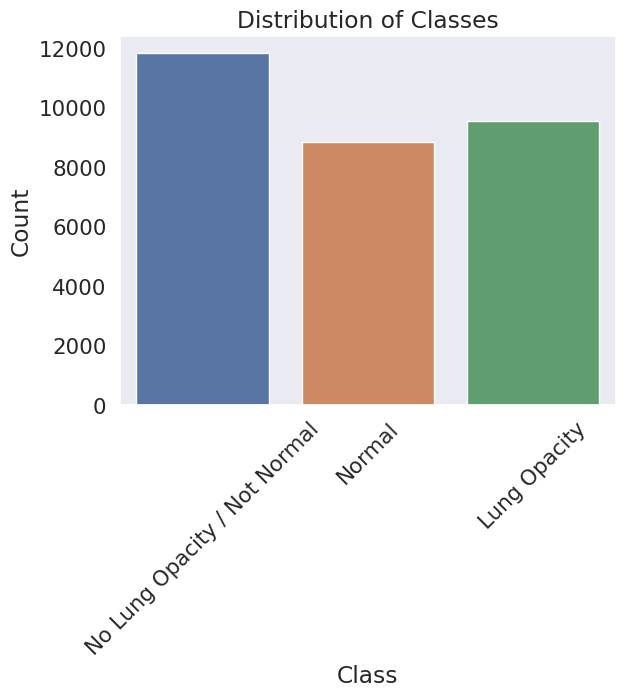

In [184]:
sns.countplot(x='class',data=classInfo);

# Displaying labels, title, and rotate the x-axis labels for better visualization
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Images from different classes
  1.Normal;
  2.No Lung Opacity / Not Normal;
  3.Lung Opacity

In [185]:
def get_feature_distribution(data, feature):
    # Get the count for each label
    label_counts = data[feature].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    print("Feature: {}".format(feature))
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000) / 100
        print("{:<30s}:   {} or {}%".format(label, count, percent))

get_feature_distribution(classInfo, 'class')

Feature: class
No Lung Opacity / Not Normal  :   11821 or 39.1%
Lung Opacity                  :   9555 or 31.61%
Normal                        :   8851 or 29.28%


In [186]:
classInfo[classInfo.duplicated()] #Detect duplicate Records

patientId         class
5      00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
9      00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
15     00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
17     00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
20     00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity
...                                     ...           ...
30209  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  Lung Opacity
30215  c1cddf32-b957-4753-acaa-472ab1447e86  Lung Opacity
30220  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2  Lung Opacity
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  Lung Opacity

[3543 rows x 2 columns]

#### As suspected, there are 3543 duplicated records

In [187]:
# The expression classInfo.duplicated() returns a boolean mask with True for duplicate rows and False for non-duplicates.
# When this boolean mask is used to index the DataFrame, only the duplicate rows are selected.
duplicate_rows = classInfo[classInfo.duplicated()]

# Get the dimensions (number of rows and columns) of the DataFrame containing duplicate rows
# The 'shape' attribute of the DataFrame returns a tuple (num_rows, num_columns) representing its dimensions.
shape_of_duplicate_rows = duplicate_rows.shape
print(shape_of_duplicate_rows)

(3543, 2)


#### Checking for Missing Values

In [188]:
# Defining a function to check for missing values in each column of a DataFrame
def missing_check(df):
    # Calculate the total number of missing values in each column and sort in descending order
    total = df.isnull().sum().sort_values(ascending=False)

    # Calculate the percentage of missing values in each column and sort in descending order
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

    # Combine the 'total' and 'percent' Series into a new DataFrame named 'missing_data'
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    # Return the DataFrame containing information about missing values
    return missing_data

In [189]:
# Call the missing_check function to check for missing values in each column of the DataFrame classInfo
missing_data = missing_check(classInfo)


# Print the DataFrame containing information about missing values
print(missing_data)

           Total  Percent
patientId      0      0.0
class          0      0.0


#### No Missing Values found in the dataset

In [190]:
# The `info()` method provides a concise summary of the DataFrame's structure.
# It displays essential information about the DataFrame, including the number of non-null values,
# data types of each column, and memory usage.
trainlabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


#### Train labels also contains 30K records same as meta data

In [191]:
# The `trainlabels.patientId` selects the 'patientId' column from the DataFrame.
# The `nunique()` method is then called on this column to get the number of unique patient IDs.
num_unique_patients = trainlabels.patientId.nunique()

#### Unique patient Id count also matched with class info .
#### Lets check for same patient which we verified the class Info.

In [192]:
# It selects rows from the DataFrame where the 'patientId' column has the value 'c1f7889a-9ea9-4acb-b64c-b737c929599a'.
selected_data = trainlabels[trainlabels.patientId == 'c1f7889a-9ea9-4acb-b64c-b737c929599a']

# Set the option to display all columns in a single line
pd.set_option('display.expand_frame_repr', False)

# Print the DataFrame containing the selected rows
print(selected_data)

                                  patientId      x      y  width  height  Target
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0       1
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0       1


#### From the above result, it is observed that 2 Records exists for same patient with different dimension

#### This may be due to in the X-ray opacity has been deteched at multiple locations

In [193]:
# It selects rows from the DataFrame where all columns have duplicate values, indicating duplicate rows.
duplicated_rows = trainlabels[trainlabels.duplicated()]

# Print the DataFrame containing the duplicate rows
print(duplicated_rows)

Empty DataFrame
Columns: [patientId, x, y, width, height, Target]
Index: []


#### No Duplicate Records fround from the above result

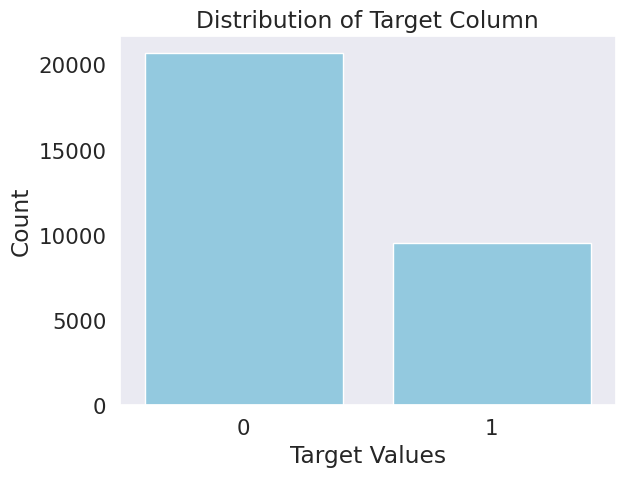

In [194]:
plt.figure()  # Create a new figure to ensure the previous plot doesn't overlap
sns.countplot(x='Target', data=trainlabels, color='skyblue',orient='h')
plt.title('Distribution of Target Column')
plt.xlabel('Target Values')
plt.ylabel('Count')

# Display all the countplots
plt.show()

#### There are 2 values in Target column 0 & 1
#### In classInfo Dataframe, we could see 3 different classes
#### Lets proceed further to check how Target and Class columns are related.

In [195]:
# Call the missing_check function to check for missing values in each column of the DataFrame 'trainlabels'
missing_data_trainlabels = missing_check(trainlabels)

# Print the DataFrame containing information about missing values
print(missing_data_trainlabels)

           Total   Percent
x          20672  0.683892
y          20672  0.683892
width      20672  0.683892
height     20672  0.683892
patientId      0  0.000000
Target         0  0.000000


In [196]:
# Select rows where the 'x' column has missing values (NaN)
missing_x_rows = trainlabels[trainlabels.x.isna()]

# Print the DataFrame containing rows with missing values in the 'x' column
print(missing_x_rows)

                                  patientId   x   y  width  height  Target
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6 NaN NaN    NaN     NaN       0
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd NaN NaN    NaN     NaN       0
2      00322d4d-1c29-4943-afc9-b6754be640eb NaN NaN    NaN     NaN       0
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5 NaN NaN    NaN     NaN       0
6      00569f44-917d-4c86-a842-81832af98c30 NaN NaN    NaN     NaN       0
...                                     ...  ..  ..    ...     ...     ...
30216  c1cf3255-d734-4980-bfe0-967902ad7ed9 NaN NaN    NaN     NaN       0
30217  c1e228e4-b7b4-432b-a735-36c48fdb806f NaN NaN    NaN     NaN       0
30218  c1e3eb82-c55a-471f-a57f-fe1a823469da NaN NaN    NaN     NaN       0
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba NaN NaN    NaN     NaN       0
30224  c1f6b555-2eb1-4231-98f6-50a963976431 NaN NaN    NaN     NaN       0

[20672 rows x 6 columns]


#### Some of X,Y values found to have missing for few records . This can be due to the fact that for a normal patient these values could be not applicable.

In [197]:

# Select rows where the 'x' column has missing values (NaN)
# The expression 'trainlabels.x.isna()' returns a boolean mask with 'True' for rows where 'x' is NaN and 'False' otherwise.
# This boolean mask is then used as an index to select specific rows from the DataFrame 'trainlabels'.
# The result is a new DataFrame containing only the rows where the 'x' column has missing values.
missing_x_rows = trainlabels[trainlabels.x.isna()]

# Retrieve the unique values in the 'Target' column for the selected rows
# The 'Target' column of the DataFrame 'missing_x_rows' is accessed using ['Target'].
# The 'unique()' method is then called on this column to retrieve the unique values in the 'Target' column.
unique_target_values = missing_x_rows['Target'].unique()

# Print the unique values in the 'Target' column for the selected rows
print(unique_target_values)

[0]


#### From the above output, it is confirmed that for normal patients dimensions are not available.

In [198]:
# The code calls the 'describe()' method on the DataFrame 'trainlabels' to get summary statistics of the numerical columns.

# Display summary statistics of the DataFrame 'trainlabels'
# The 'describe()' method computes various summary statistics for each numerical column in the DataFrame.
# The statistics include count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2),
# 75th percentile (Q3), and maximum value.
# The output will show these statistics for each numerical column in 'trainlabels'.
summary_stats = trainlabels.describe()

# Print the summary statistics of the DataFrame 'trainlabels'
print(summary_stats)

                 x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000


Looks , 75% of the data represents target value 1. Count plot also shows the same. Hence,it is an imbalanced data set.

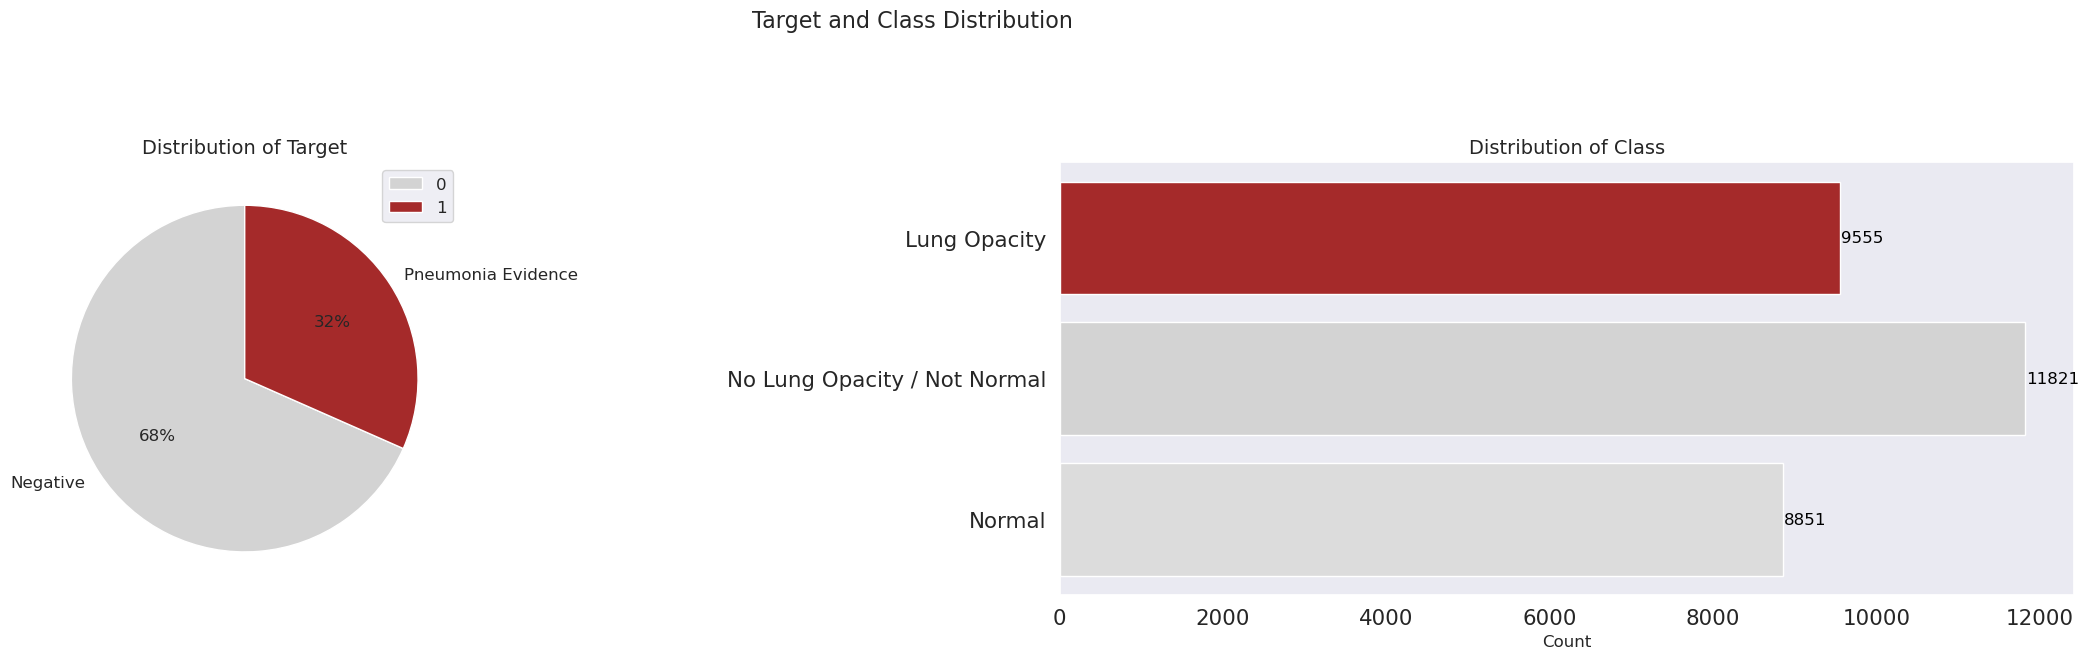

In [199]:
# Create a figure with two subplots and increase the figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))

# Plot the percentage distribution of 'Target' column using a pie chart
target_counts = trainlabels['Target'].value_counts()
ax1.pie(target_counts, labels=['Negative', 'Pneumonia Evidence'], colors=['lightgray', 'brown'],
        autopct='%.0f%%', startangle=90, textprops={'fontsize': 12})
ax1.set_title('Distribution of Target', fontsize=14)

# Plot the percentage distribution of 'class' column using a horizontal bar plot
class_counts = classInfo['class'].value_counts().sort_index(ascending=False)
ax2.barh(class_counts.index, class_counts, color=['gainsboro', 'lightgray', 'brown'])
ax2.set_xlabel('Count', fontsize=12)
ax2.set_title('Distribution of Class', fontsize=14)

# Add data labels to the bar plot
for i, v in enumerate(class_counts):
    ax2.text(v + 10, i, str(v), fontsize=12, color='black', va='center')

# Add a legend for the pie chart
ax1.legend(target_counts.index, loc='best', fontsize=12)

# Adjust the layout for subplots and add an overall title for the figure
plt.suptitle('Target and Class Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # Adjust the 'rect' parameter to control the figure layout

# Show the plots
plt.show()

#### Lets concatenate classInfo and trainlabels . Before concatinating them lets remove duplicate records from class info

In [200]:
# Drop duplicate rows from the DataFrame 'classInfo'
classInfo.drop_duplicates(inplace=True)

# Print the DataFrame after dropping duplicates
print(classInfo)

                                  patientId                         class
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
...                                     ...                           ...
30219  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2                  Lung Opacity
30221  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity

[26684 rows x 2 columns]


In [201]:
# The code performs an inner join (merge) between the 'trainlabels' and 'classInfo' DataFrames based on the 'patientId' column.

# Merge the DataFrames 'trainlabels' and 'classInfo' based on the common 'patientId' column.
# The 'left_on' parameter specifies the column in the left DataFrame (trainlabels) to use for the merge.
# The 'right_on' parameter specifies the column in the right DataFrame (classInfo) to use for the merge.
# The 'how' parameter is set to 'inner', which means only the rows with matching 'patientId' values in both DataFrames will be included in the result.

traindf = trainlabels.merge(classInfo, left_on='patientId', right_on='patientId', how='inner')

In [202]:
traindf.head() #Top 5 rows for traiing dataset

patientId      x      y  width  height  Target                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1                  Lung Opacity

#### Lets check for specific patient how data has been concatinated.

In [203]:
# The code filters the DataFrame 'traindf' to select rows where the 'patientId' column has the value 'c1f7889a-9ea9-4acb-b64c-b737c929599a'.

# Select rows from the DataFrame 'traindf' where the 'patientId' column is equal to 'c1f7889a-9ea9-4acb-b64c-b737c929599a'.
filtered_traindf = traindf[traindf.patientId == 'c1f7889a-9ea9-4acb-b64c-b737c929599a']

# Print the output to see the DataFrame with filtered rows
print(filtered_traindf)

                                  patientId      x      y  width  height  Target         class
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0       1  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0       1  Lung Opacity


#### Good, same patient has different dimension values with same target value
#### Now lets see how class and target are related to each other

In [204]:
# The code retrieves the unique values from the 'Target' column in the DataFrame 'traindf'.

# Get the unique values from the 'Target' column in the DataFrame 'traindf'.
unique_targets = traindf.Target.unique()

# Print the unique values to see the distinct target values in the 'traindf' DataFrame.
print(unique_targets)

[0 1]


In [205]:
# The code groups the DataFrame 'traindf' by the columns 'class' and 'Target', and then calculates the size of each group (i.e., the number of patients) within each combination of 'class' and 'Target'.

# Group the DataFrame 'traindf' by the columns 'class' and 'Target', and calculate the size of each group (number of patients).
grouped_traindf = traindf.groupby(['class', 'Target']).size().reset_index(name='Patient Count')

# Print the output to see the DataFrame with the grouped results and patient counts.
print(grouped_traindf)

                          class  Target  Patient Count
0                  Lung Opacity       1           9555
1  No Lung Opacity / Not Normal       0          11821
2                        Normal       0           8851


## Step 4: Preprocessing and Visualisation of different classes

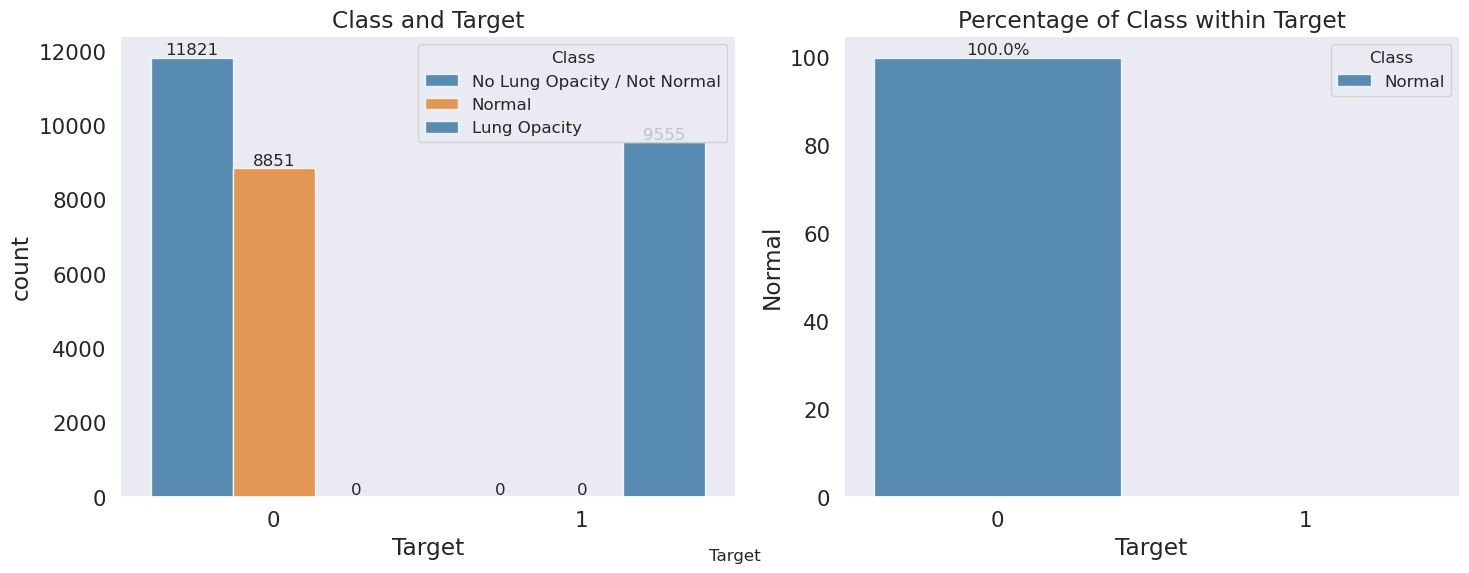

In [206]:
# The code groups the DataFrame 'traindf' by the 'Target' and 'class' columns, and calculates the count of each unique combination.
# It then creates a bar plot and a percentage bar chart to visualize the relationship between 'Target' and 'class' with improved visualizations.

# Create a figure with two subplots side by side and set the figure size to (15, 6).
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Group the DataFrame 'traindf' by 'Target' and 'class', and calculate the count of each unique combination.
tmp = traindf.groupby(['Target', 'class']).size().reset_index(name='count')

# Create a bar plot using Seaborn's 'sns.barplot'.
# 'x' represents the 'Target' column, 'y' represents the 'count' column (count of each class per Target),
# and 'hue' represents the 'class' column to distinguish the classes in the plot.
# 'palette' sets the color palette for the bars.
# 'alpha' adjusts the transparency of the bars to improve visibility.
sns.barplot(ax=ax1, x='Target', y='count', hue='class', data=tmp, palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# Add data labels to the bars to display the exact count values.
for p in ax1.patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if height is not NaN before converting to integer
        ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)
    else:  # Handle NaN values and display "0" for zero counts
        ax1.annotate('0', (p.get_x() + p.get_width() / 2, 0), ha='center', va='bottom', fontsize=12)

# Set a title for the first plot.
ax1.set_title("Class and Target")

# Set the legend title and position for better readability in the first plot.
ax1.legend(title='Class', title_fontsize=12, fontsize=12, loc='upper right')

# Calculate the percentage of each class within each 'Target' group.
percentage_df = tmp.pivot_table(index='Target', columns='class', values='count', aggfunc=lambda x: x / x.sum() * 100).reset_index()

# Create a percentage bar chart using Seaborn's 'sns.barplot' for the second subplot.
sns.barplot(ax=ax2, x='Target', y='Normal', data=percentage_df, color='#1f77b4', label='Normal', alpha=0.8)

# Check if the 'Pneumonia' class is present in 'percentage_df'.
if 'Pneumonia' in percentage_df.columns:
    sns.barplot(ax=ax2, x='Target', y='Pneumonia', data=percentage_df, color='#ff7f0e', label='Pneumonia', alpha=0.8)
else:
    percentage_df['Pneumonia'] = 0

# Add data labels to the percentage bars to display the exact percentage values.
for p in ax2.patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if height is not NaN before displaying data labels
        ax2.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Set a title for the second plot.
ax2.set_title("Percentage of Class within Target")

# Set the legend title and position for better readability in the second plot.
ax2.legend(title='Class', title_fontsize=12, fontsize=12, loc='upper right')

# Set common y-axis label for both subplots.
fig.text(0.5, 0.04, 'Target', ha='center', fontsize=12)

# Show the plots.
plt.tight_layout()
plt.show()

#### As suspected, class with Normal and No Lung Opacity / Not Normal has been classified into single target value that is 'O'. So we can summarize that the prediction which we have to do is like Patient has Lung Opacity ir not. 
#### Because Normal and not normal patients are combines in same Target.

#### Prediction: Binary classification i.e. Patient has Lung Opacity or not ?

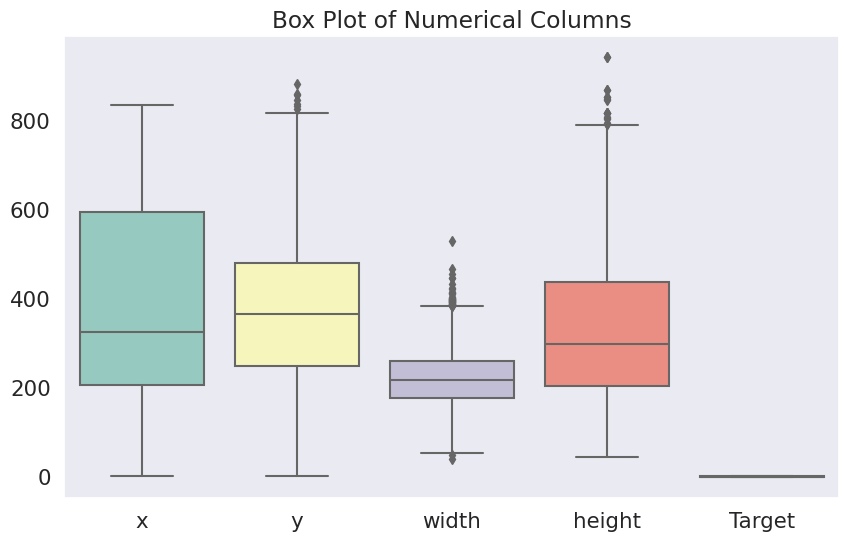

In [207]:
# Create a box plot to visualize the distribution of numerical columns in 'traindf'.

# Set the figure size to (10, 6) for better visibility.
plt.figure(figsize=(10, 6))

# Create the box plot using Seaborn.
sns.boxplot(data=traindf, palette='Set3')

# Add a title to the plot.
plt.title("Box Plot of Numerical Columns")

# Show the plot.
plt.show()

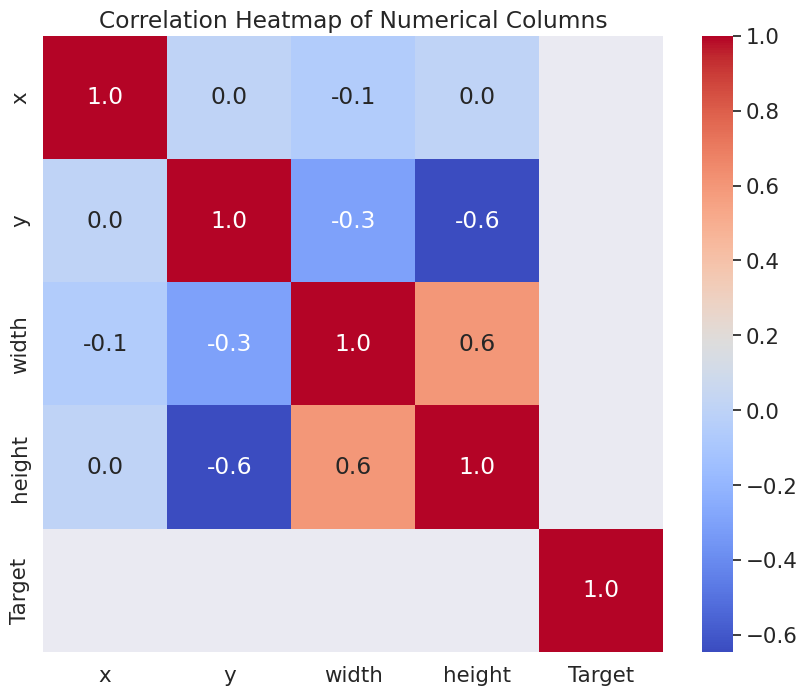

In [208]:
# The 'corr()' function computes the pairwise correlation of columns in a DataFrame. It returns a new DataFrame
# where each entry is the correlation coefficient between two columns. The correlation coefficient varies
# between -1 and 1. A positive value indicates a positive correlation (when one variable increases, the other tends
# to increase as well), while a negative value indicates a negative correlation (when one variable increases, the
# other tends to decrease).

# Let's compute the correlation matrix for the 'traindf' DataFrame:
correlation_matrix = traindf.corr()

# Create a heatmap to visualize the correlation matrix using Seaborn's 'sns.heatmap' function.

# Set the figure size to (10, 8) for better visibility.
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn.
# 'annot' parameter displays the correlation coefficient values on the heatmap.
# 'fmt' parameter sets the format of the annotation to show correlation coefficients with one decimal point.
# 'cmap' parameter sets the color map for the heatmap.
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")

# Add a title to the plot.
plt.title("Correlation Heatmap of Numerical Columns")

# Show the plot.
plt.show()

#### Width & height has highest positive correlation
#### y & height has highest negative correlation

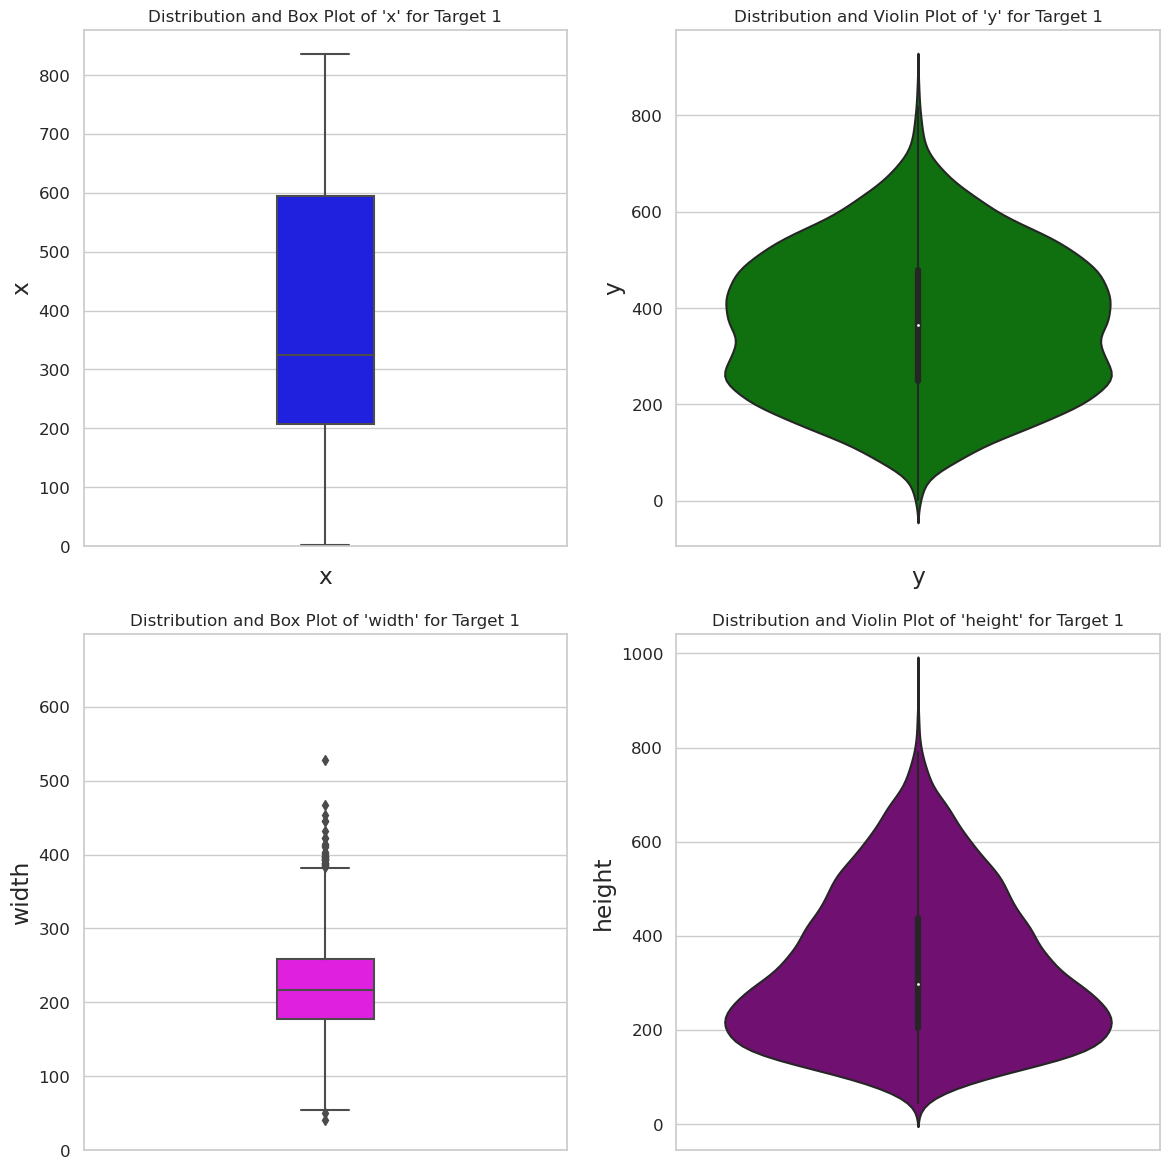

In [209]:
# In this code, we are visualizing the distribution of numerical columns for the rows where 'Target' equals 1.
# We create four subplots (2x2) to display the distribution of 'x', 'y', 'width', and 'height'.

# Let's create the 'target1' DataFrame containing rows where 'Target' is equal to 1.
target1 = traindf[traindf['Target'] == 1]

# Set the Seaborn style to 'whitegrid' for better visibility of grids on the plots.
sns.set_style('whitegrid')

# Create a figure and subplots with a size of (12, 12).
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Plot the distribution of 'x' with a KDE plot and a box plot on the first subplot.
sns.histplot(target1['x'], kde=True, bins=50, color="red", ax=ax[0, 0])
sns.boxplot(y=target1['x'], color="blue", width=0.2, ax=ax[0, 0])
ax[0, 0].set_title("Distribution and Box Plot of 'x' for Target 1", fontsize=12)

# Plot the distribution of 'y' with a KDE plot and a violin plot on the second subplot.
sns.histplot(target1['y'], kde=True, bins=50, color="blue", ax=ax[0, 1])
sns.violinplot(y=target1['y'], color="green", ax=ax[0, 1])
ax[0, 1].set_title("Distribution and Violin Plot of 'y' for Target 1", fontsize=12)

# Plot the distribution of 'width' with a KDE plot and a box plot on the third subplot.
sns.histplot(target1['width'], kde=True, bins=50, color="green", ax=ax[1, 0])
sns.boxplot(y=target1['width'], color="magenta", width=0.2, ax=ax[1, 0])
ax[1, 0].set_title("Distribution and Box Plot of 'width' for Target 1", fontsize=12)

# Plot the distribution of 'height' with a KDE plot and a violin plot on the fourth subplot.
sns.histplot(target1['height'], kde=True, bins=50, color="magenta", ax=ax[1, 1])
sns.violinplot(y=target1['height'], color="purple", ax=ax[1, 1])
ax[1, 1].set_title("Distribution and Violin Plot of 'height' for Target 1", fontsize=12)

# Remove x-axis labels from KDE plots to avoid clutter.
for i in range(2):
    ax[1, i].set_xlabel('')

# Adjust the tick label font size for better readability.
for ax_row in ax:
    for ax_col in ax_row:
        ax_col.tick_params(axis='both', which='major', labelsize=12)

# Adjust the layout to avoid overlapping titles and labels.
plt.tight_layout()

# Display the plot.
plt.show()

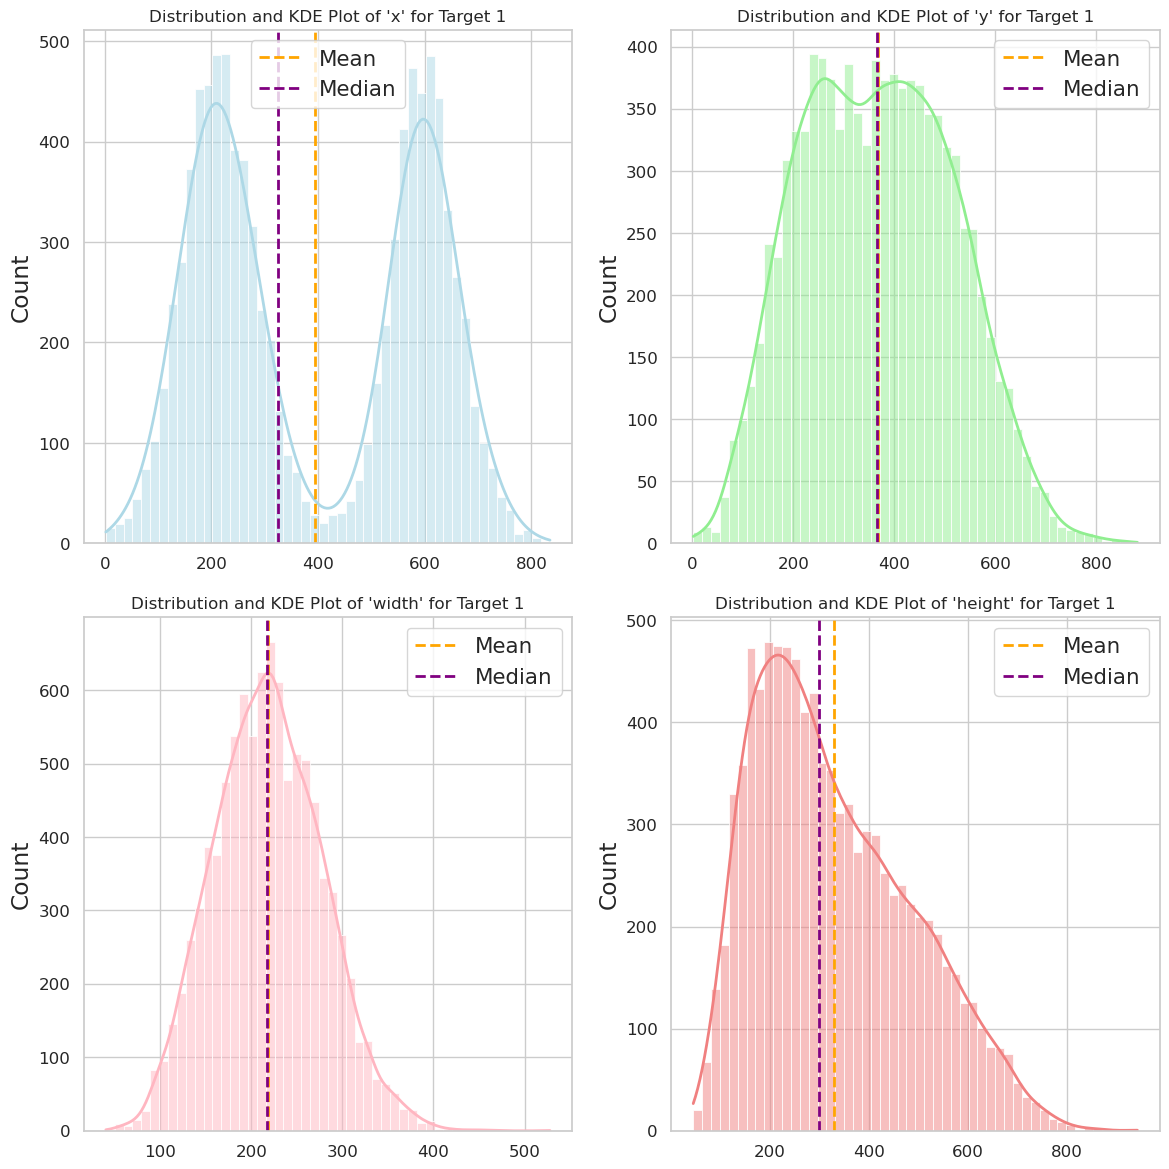

In [210]:
# In this code, we are visualizing the distribution of numerical columns for the rows where 'Target' equals 1.
# We create four subplots (2x2) to display the distribution of 'x', 'y', 'width', and 'height'.

# Let's create the 'target1' DataFrame containing rows where 'Target' is equal to 1.
target1 = traindf[traindf['Target'] == 1]

# Set the Seaborn style to 'whitegrid' for better visibility of grids on the plots.
sns.set_style('whitegrid')

# Create a figure and subplots with a size of (12, 12).
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Plot the distribution of 'x' with a histogram and a KDE plot on the first subplot.
sns.histplot(target1['x'], bins=50, color="lightblue", ax=ax[0, 0], kde=True, line_kws={'color': 'red', 'lw': 2})
mean_x = target1['x'].mean()
median_x = target1['x'].median()
ax[0, 0].axvline(mean_x, color='orange', linestyle='dashed', linewidth=2, label='Mean')
ax[0, 0].axvline(median_x, color='purple', linestyle='dashed', linewidth=2, label='Median')
ax[0, 0].legend()
ax[0, 0].set_title("Distribution and KDE Plot of 'x' for Target 1", fontsize=12)

# Plot the distribution of 'y' with a histogram and a KDE plot on the second subplot.
sns.histplot(target1['y'], bins=50, color="lightgreen", ax=ax[0, 1], kde=True, line_kws={'color': 'blue', 'lw': 2})
mean_y = target1['y'].mean()
median_y = target1['y'].median()
ax[0, 1].axvline(mean_y, color='orange', linestyle='dashed', linewidth=2, label='Mean')
ax[0, 1].axvline(median_y, color='purple', linestyle='dashed', linewidth=2, label='Median')
ax[0, 1].legend()
ax[0, 1].set_title("Distribution and KDE Plot of 'y' for Target 1", fontsize=12)

# Plot the distribution of 'width' with a histogram and a KDE plot on the third subplot.
sns.histplot(target1['width'], bins=50, color="lightpink", ax=ax[1, 0], kde=True, line_kws={'color': 'red', 'lw': 2})
mean_width = target1['width'].mean()
median_width = target1['width'].median()
ax[1, 0].axvline(mean_width, color='orange', linestyle='dashed', linewidth=2, label='Mean')
ax[1, 0].axvline(median_width, color='purple', linestyle='dashed', linewidth=2, label='Median')
ax[1, 0].legend()
ax[1, 0].set_title("Distribution and KDE Plot of 'width' for Target 1", fontsize=12)

# Plot the distribution of 'height' with a histogram and a KDE plot on the fourth subplot.
sns.histplot(target1['height'], bins=50, color="lightcoral", ax=ax[1, 1], kde=True, line_kws={'color': 'blue', 'lw': 2})
mean_height = target1['height'].mean()
median_height = target1['height'].median()
ax[1, 1].axvline(mean_height, color='orange', linestyle='dashed', linewidth=2, label='Mean')
ax[1, 1].axvline(median_height, color='purple', linestyle='dashed', linewidth=2, label='Median')
ax[1, 1].legend()
ax[1, 1].set_title("Distribution and KDE Plot of 'height' for Target 1", fontsize=12)

# Remove x-axis labels from all plots to avoid clutter.
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('')

# Adjust the tick label font size for better readability.
for ax_row in ax:
    for ax_col in ax_row:
        ax_col.tick_params(axis='both', which='major', labelsize=12)

# Adjust the layout to avoid overlapping titles and labels.
plt.tight_layout()

# Display the plot.
plt.show()

#### Width is more evenly ditributed
#### Height is left skewed distribution with majority of datapoints is towards right

In [211]:
# Define the file paths for the train and test images directories using the 'Path' class.

# File path for the directory containing the train images.
trainImagesPath1 = Path("/kaggle/input/pneumonia-detection/stage_2_train_images/stage_2_train_images")

# File path for the directory containing the test images.
testImagesPath1 = Path("/kaggle/input/pneumonia-detection/stage_2_test_images/stage_2_test_images")

In [212]:
# 'trainImagesPath1' is the directory path containing the train images.
# 'testImagesPath1' is the directory path containing the test images.

# List all the filenames (images) present in the 'trainImagesPath1' directory.
image_train_path = os.listdir(trainImagesPath1)

# List all the filenames (images) present in the 'testImagesPath1' directory.
image_test_path = os.listdir(testImagesPath1)

# Print the number of images in the train set and the test set.
print("Number of images in train set:", len(image_train_path), "\nNumber of images in test set:", len(image_test_path))

Number of images in train set: 26684 
Number of images in test set: 3000



#### Train images length matched with unique patient id's in traindf.

## Step 3: Map training and testing images to its annotations.

In [213]:
# Get the patient ID from the first three rows of the 'traindf' DataFrame and convert it to a list.
# Then, select the first element (the patient ID) from the list.
samplePatientID = list(traindf[:3].T.to_dict().values())[0]['patientId']

# Create a file path to the DICOM file corresponding to the selected patient ID.
# The 'trainImagesPath1' variable should contain the path to the directory containing the DICOM images.
dcm_path = trainImagesPath1 / samplePatientID

# Change the file extension of the file path to '.dcm' (assuming the original file has a different extension).
dcm_path = dcm_path.with_suffix(".dcm")

# Read the DICOM file using the 'pydicom.read_file()' function and store it in the 'dcm' variable.
dcm = pydicom.read_file(dcm_path)

# Print the DICOM data.
print(dcm)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

#### We have available some useful information in the DICOM metadata with predictive value, for example: Patient sex; Patient age; Modality; Body part examined; View position; Rows & Columns; Pixel Spacing.

## Step 5: Display images with bounding box

In [214]:
# Define a function 'show_dicom_images' that takes 'data' as input (DataFrame containing DICOM information).
def show_dicom_images(data):
    # Convert the DataFrame 'data' to a list of dictionaries and store it in 'img_data'.
    img_data = list(data.T.to_dict().values())

    # Create a 3x3 grid of subplots using matplotlib with a figure size of 16x18.
    f, ax = plt.subplots(3, 3, figsize=(16, 18))

    # Loop through each item in 'img_data' and extract DICOM information.
    for i, data_row in enumerate(img_data):
        # Create a file path to the DICOM file corresponding to the patient ID.
        dcm_path = trainImagesPath1 / data_row['patientId']
        dcm_path = dcm_path.with_suffix(".dcm")

        # Read the DICOM file using 'pydicom.read_file()' and store the DICOM data in 'data_row_img_data'.
        data_row_img_data = pydicom.read_file(dcm_path)

        # Extract relevant metadata from the DICOM data.
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex

        # Display the DICOM image using 'imshow' on the appropriate subplot and set axis off.
        ax[i // 3, i % 3].imshow(data_row_img_data.pixel_array, cmap=plt.cm.bone)
        ax[i // 3, i % 3].axis('off')

        # Set the title of the subplot with patient information and other details.
        ax[i // 3, i % 3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row['x'], data_row['y'], data_row['width'], data_row['height']))

    # Display the grid of subplots containing the DICOM images and their information.
    plt.show()

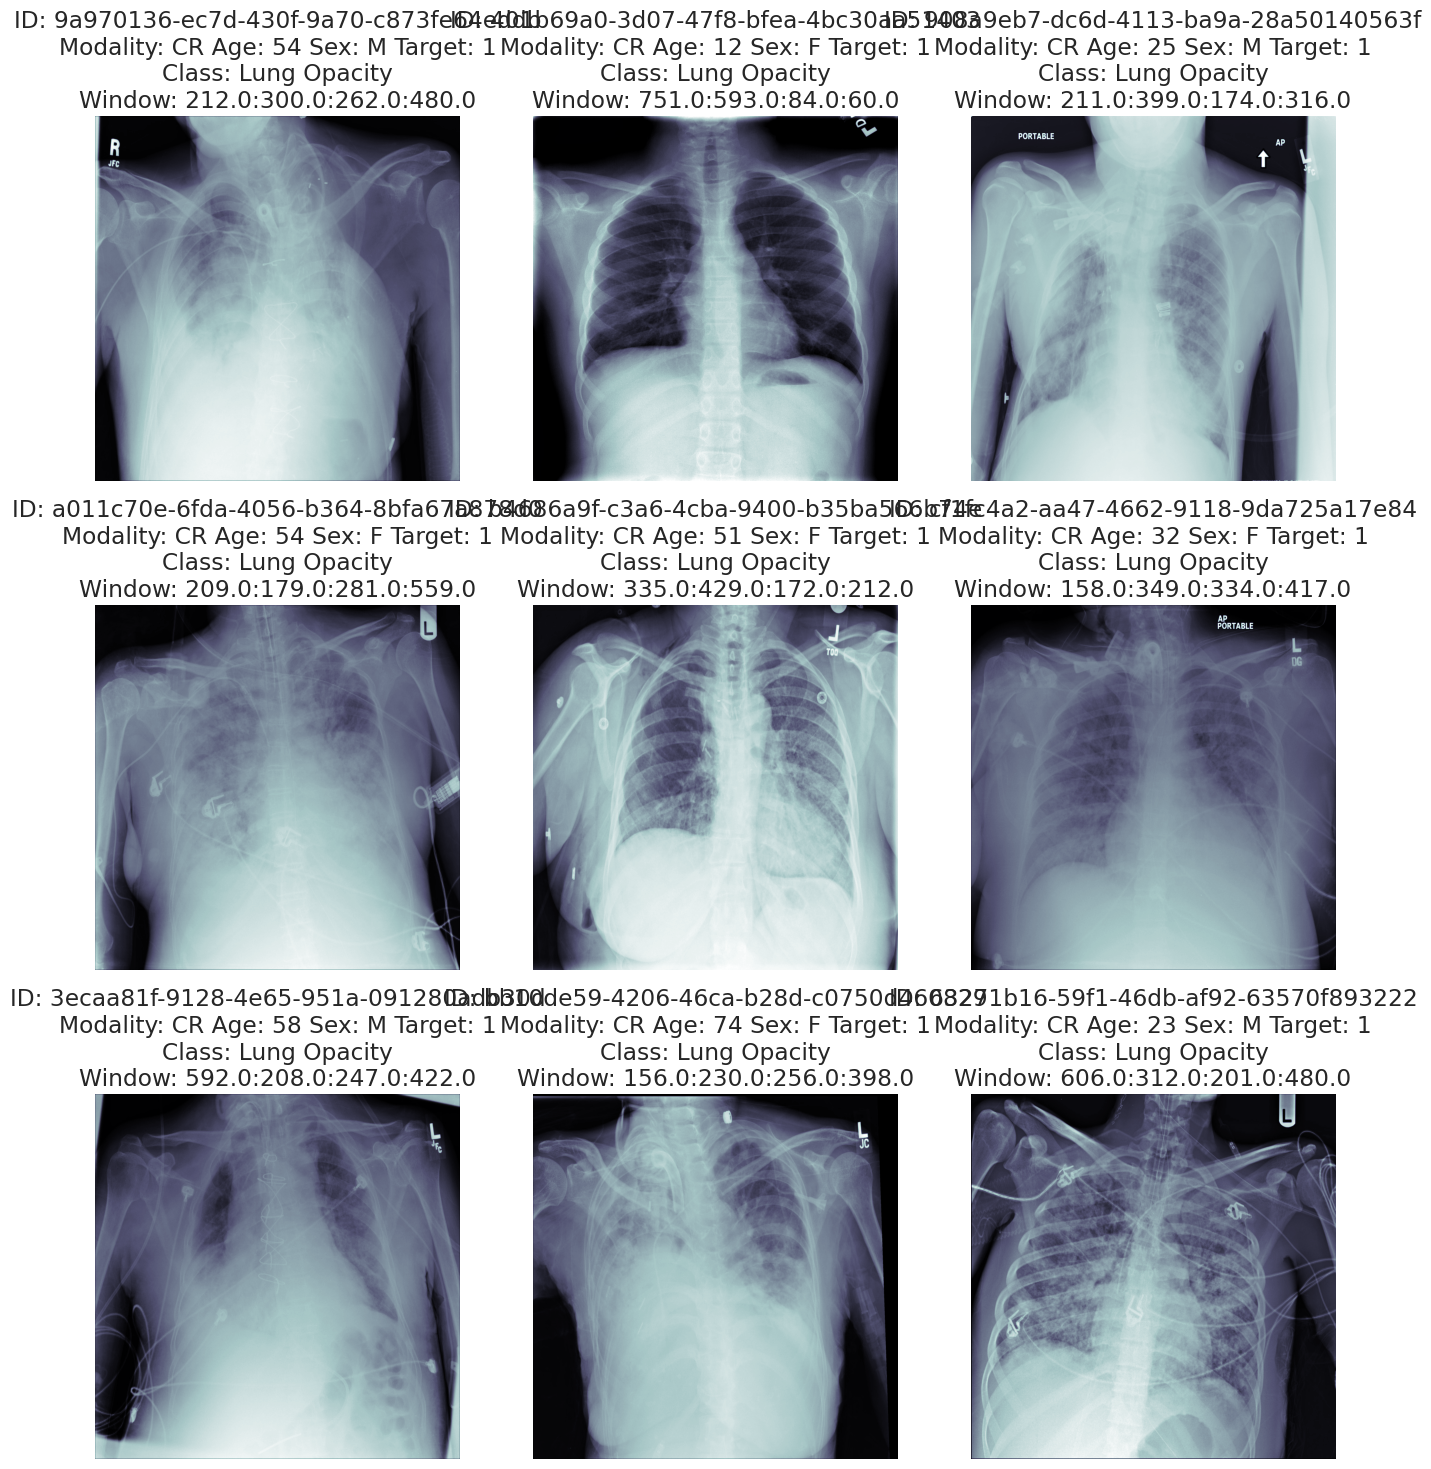

In [215]:
# Display a sample of 9 DICOM images from the 'traindf' DataFrame where 'Target' is equal to 1.
show_dicom_images(traindf[traindf['Target'] == 1].sample(9))

#### We would like to represent the images with the overlay boxes superposed. For this, we will need first to parse the whole dataset with Target = 1 and gather all coordinates of the windows showing a Lung Opacity on the same image.

In [216]:
# Define a function 'show_dicom_images_with_boxes' that takes 'data' as input (DataFrame containing DICOM information).
def show_dicom_images_with_boxes(data):
    # Convert the DataFrame 'data' to a list of dictionaries and store it in 'img_data'.
    img_data = list(data.T.to_dict().values())

    # Create a 3x3 grid of subplots using matplotlib with a figure size of 16x18.
    f, ax = plt.subplots(3, 3, figsize=(16, 18))

    # Loop through each item in 'img_data' and extract DICOM information.
    for i, data_row in enumerate(img_data):
        # Create a file path to the DICOM file corresponding to the patient ID.
        dcm_path = trainImagesPath1 / data_row['patientId']
        dcm_path = dcm_path.with_suffix(".dcm")

        # Read the DICOM file using 'pydicom.read_file()' and store the DICOM data in 'data_row_img_data'.
        data_row_img_data = pydicom.read_file(dcm_path)

        # Extract relevant metadata from the DICOM data.
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex

        # Display the DICOM image using 'imshow' on the appropriate subplot and set axis off.
        ax[i // 3, i % 3].imshow(data_row_img_data.pixel_array, cmap=plt.cm.bone)
        ax[i // 3, i % 3].axis('off')

        # Set the title of the subplot with patient information and class details.
        ax[i // 3, i % 3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))

        # Filter the DataFrame 'traindf' to extract rows with the same patient ID as the current data_row.
        rows = traindf[traindf['patientId'] == data_row['patientId']]

        # Convert the filtered DataFrame 'rows' to a list of dictionaries and store it in 'box_data'.
        box_data = list(rows.T.to_dict().values())

        # Loop through each item in 'box_data' and draw a red rectangle (box) on the corresponding subplot.
        for j, row in enumerate(box_data):
            ax[i // 3, i % 3].add_patch(Rectangle(xy=(row['x'], row['y']),
                                                 width=row['width'], height=row['height'],
                                                 linewidth=2, edgecolor='r', facecolor='none'))

    # Display the grid of subplots containing the DICOM images with bounding boxes.
    plt.show()

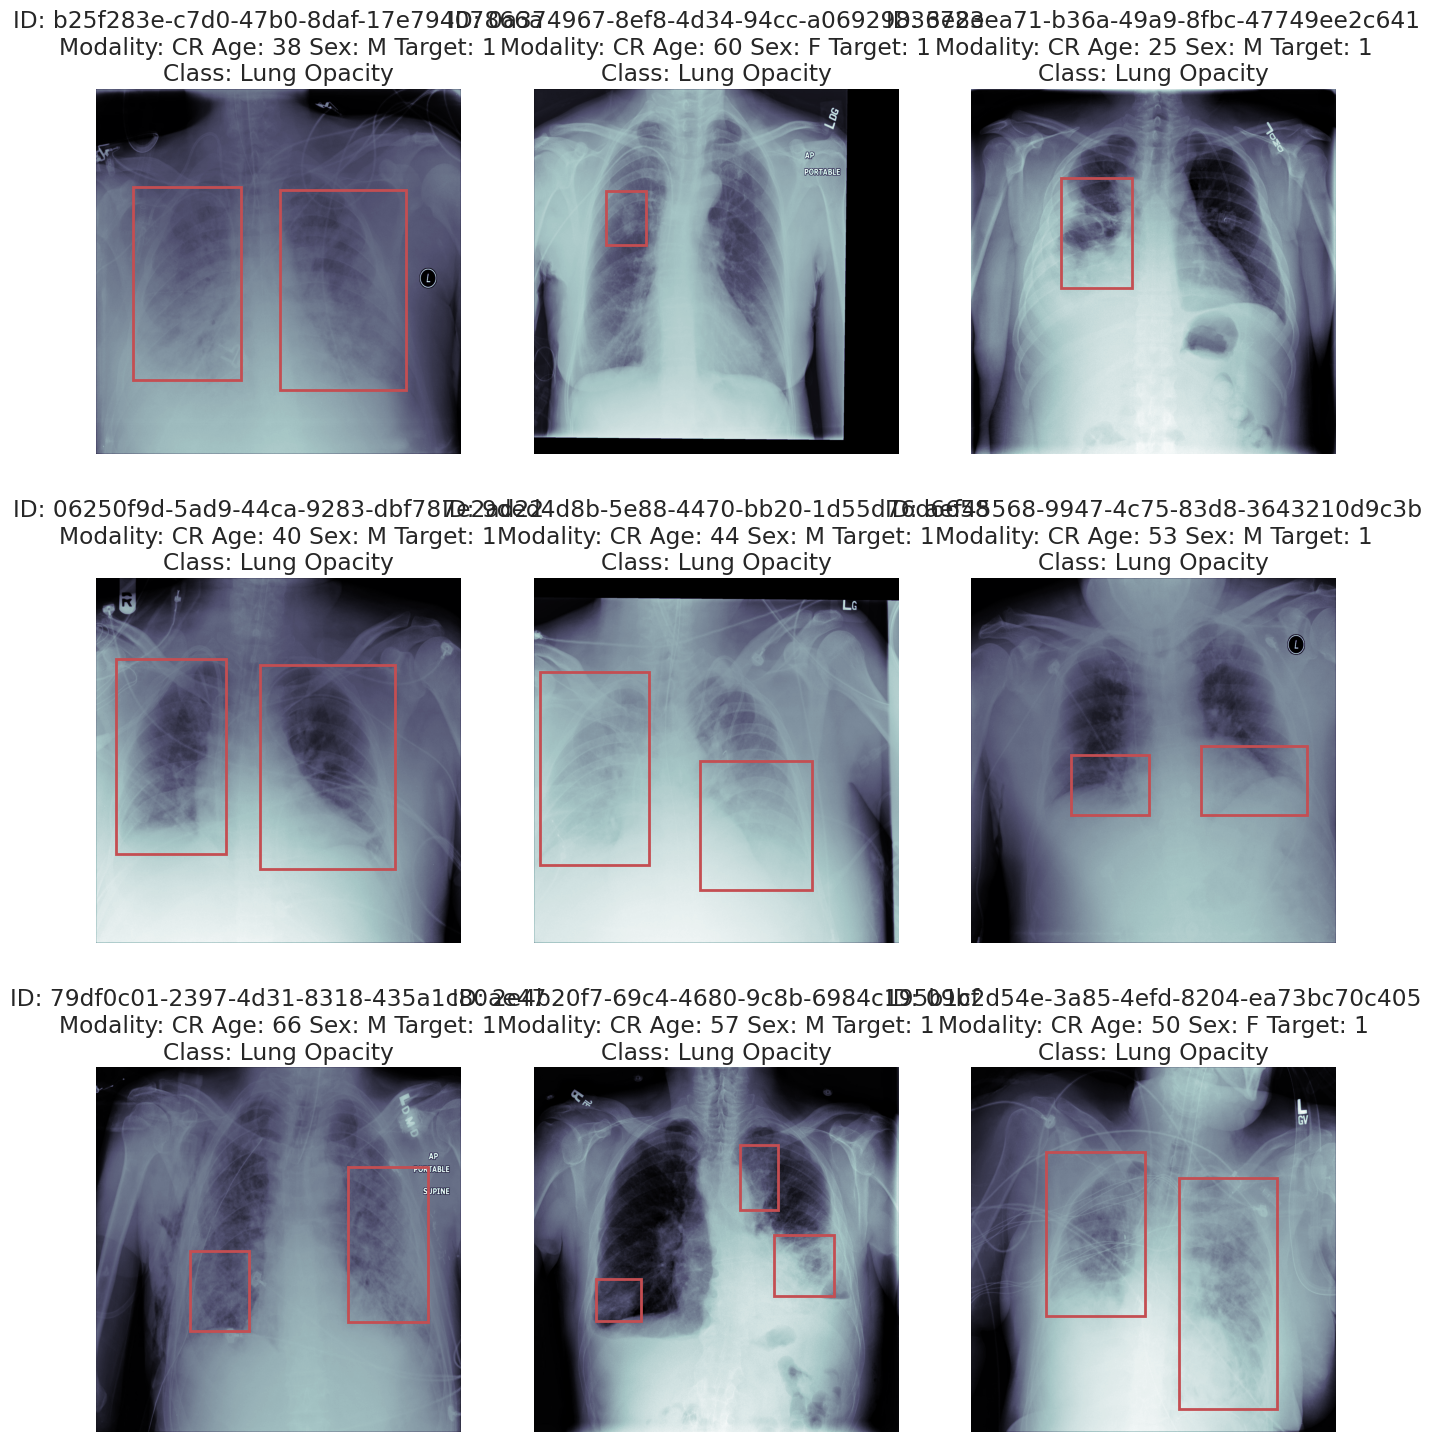

In [217]:
# Display a sample of 9 DICOM images with bounding boxes from the 'traindf' DataFrame where 'Target' is equal to 1.
show_dicom_images_with_boxes(traindf[traindf['Target'] == 1].sample(9))

In [218]:
# List of DICOM metadata variables to extract.
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

# Define a function 'process_dicom_data' that takes 'data_df' (DataFrame) and 'imagesPath' (path to DICOM images) as input.
def process_dicom_data(data_df, imagesPath):
    # Loop through each variable in the 'vars' list and add them as new columns in 'data_df' with initial value as None.
    for var in vars:
        data_df[var] = None

    # Get the list of DICOM image file names from the specified 'imagesPath' directory.
    image_names = os.listdir(imagesPath)

    # Loop through each DICOM image file and process its metadata.
    for i, img_name in tqdm_notebook(enumerate(image_names)):
        # Create the path to the DICOM file using the image file name.
        dcm_path = imagesPath / img_name
        dcm_path = dcm_path.with_suffix(".dcm")

        # Read the DICOM file using 'pydicom.read_file()' and store the DICOM data in 'data_row_img_data'.
        data_row_img_data = pydicom.read_file(dcm_path)

        # Extract the index of rows in 'data_df' where the 'patientId' matches the DICOM's 'PatientID'.
        idx = (data_df['patientId'] == data_row_img_data.PatientID)

        # Update the corresponding columns in 'data_df' with DICOM metadata extracted from 'data_row_img_data'.
        data_df.loc[idx, 'Modality'] = data_row_img_data.Modality
        data_df.loc[idx, 'PatientAge'] = pd.to_numeric(data_row_img_data.PatientAge)
        data_df.loc[idx, 'PatientSex'] = data_row_img_data.PatientSex
        data_df.loc[idx, 'BodyPartExamined'] = data_row_img_data.BodyPartExamined
        data_df.loc[idx, 'ViewPosition'] = data_row_img_data.ViewPosition
        data_df.loc[idx, 'ConversionType'] = data_row_img_data.ConversionType
        data_df.loc[idx, 'Rows'] = data_row_img_data.Rows
        data_df.loc[idx, 'Columns'] = data_row_img_data.Columns
        data_df.loc[idx, 'PixelSpacing'] = str.format("{:4.3f}", data_row_img_data.PixelSpacing[0])

In [219]:
# Process DICOM metadata for the DataFrame 'traindf'.
process_dicom_data(traindf, trainImagesPath1)

0it [00:00, ?it/s]

In [220]:
# Read the CSV file named 'sampleSubPath' into a pandas DataFrame and store it in the variable 'testdf'.
# The CSV file likely contains the submission data for a machine learning model, which typically includes 
# the predictions or probabilities for each test sample in a competition or evaluation task.
# Note that 'sampleSubPath' should be the path to the CSV file containing the submission data.
testdf = pd.read_csv(sampleSubPath)

In [221]:
# Drop the 'PredictionString' column from the DataFrame 'testdf' using the 'drop' method with axis=1.
# The 'PredictionString' column likely contains the predictions or detection information made by the model,
# which is no longer needed for further processing.
testdf = testdf.drop('PredictionString', 1)

# Call the function 'process_dicom_data' with 'testdf' and 'testImagesPath1' as arguments.
# The function 'process_dicom_data' processes the DICOM data in 'testdf' by extracting relevant information
# from the DICOM files located in the directory specified by 'testImagesPath1'.
# It populates specific columns in 'testdf' with metadata information, such as 'Modality', 'PatientAge',
# 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', and 'PixelSpacing'.
process_dicom_data(testdf, testImagesPath1)

0it [00:00, ?it/s]

In [222]:
testdf.head() #Display top 5 rows of Test dataframe

patientId Modality PatientAge PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns PixelSpacing
0  0000a175-0e68-4ca4-b1af-167204a7e0bc       CR         46          F            CHEST           PA            WSD  1024    1024        0.194
1  0005d3cc-3c3f-40b9-93c3-46231c3eb813       CR         22          F            CHEST           PA            WSD  1024    1024        0.143
2  000686d7-f4fc-448d-97a0-44fa9c5d3aa6       CR         64          M            CHEST           PA            WSD  1024    1024        0.143
3  000e3a7d-c0ca-4349-bb26-5af2d8993c3d       CR         75          F            CHEST           PA            WSD  1024    1024        0.143
4  00100a24-854d-423d-a092-edcf6179e061       CR         66          F            CHEST           AP            WSD  1024    1024        0.139

In [223]:
# Access the 'Modality' column in the DataFrame 'traindf' and call the 'unique()' method on it.
# The 'unique()' method returns an array containing all the unique values present in the 'Modality' column.
# This operation provides insights into the different modalities used in the DICOM data.
traindf.Modality.unique()

array(['CR'], dtype=object)

In [224]:
# Access the 'Modality' column in the DataFrame 'testdf' and call the 'unique()' method on it.
# The 'unique()' method returns an array containing all the unique values present in the 'Modality' column.
# This operation provides insights into the different modalities used in the DICOM data.
testdf.Modality.unique()

array(['CR'], dtype=object)

The meaning of this modality is CR - Computer Radiography

#### Check Patient Age value counts 

In [225]:
# Access the 'PatientAge' column in the DataFrame 'traindf' and call the 'value_counts()' method on it.
# The 'value_counts()' method returns a Series containing counts of unique values in the 'PatientAge' column.
# It provides a distribution of the number of occurrences for each unique patient age in the dataset.
traindf['PatientAge'].value_counts()

58     955
56     869
52     791
55     767
54     717
      ... 
148      1
151      1
153      1
150      1
155      1
Name: PatientAge, Length: 97, dtype: int64

In [226]:
traindf['PatientAge'].max()

155

#### 155 could be a typo error during data collection

In [227]:
traindf['PatientAge'].min()

1

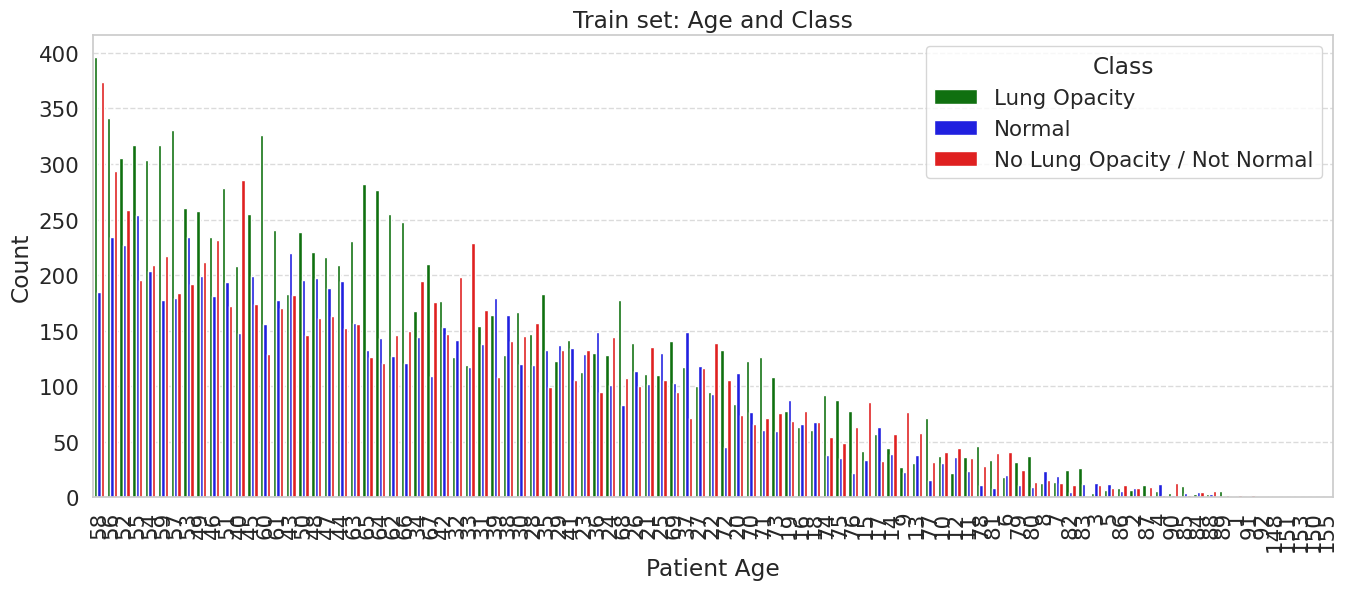

In [228]:
# Create a figure and a single subplot using 'plt.subplots' function.
# 'fig' will store the figure object, and 'ax' will store the axes object.
# Set 'nrows=1' to create a single row for subplots, and 'figsize=(16, 6)' to adjust the figure size.
fig, ax = plt.subplots(nrows=1, figsize=(16, 6))

# Create a count plot using Seaborn's 'sns.countplot' function.
# Set 'ax=ax' to specify the axes object to draw the plot on.
# Use 'x' for the 'PatientAge' column on the x-axis and 'hue' for the 'class' column to distinguish classes.
# 'data=traindf' specifies the DataFrame containing the data to be plotted.
# 'order=traindf['PatientAge'].value_counts().index' ensures the bars are ordered based on the count of ages.
# 'palette' argument is used to provide custom colors for each class.
sns.countplot(ax=ax, x='PatientAge', hue='class', data=traindf, order=traindf['PatientAge'].value_counts().index,
              palette={"Lung Opacity": "red", "Normal": "blue", "No Lung Opacity / Not Normal": "green"})

# Set the title for the plot.
plt.title("Train set: Age and Class")

# Rotate the x-axis labels by 90 degrees to improve readability.
plt.xticks(rotation=90)

# Set labels for x and y-axis.
plt.xlabel("Patient Age")
plt.ylabel("Count")

# Display a legend on the plot.
plt.legend(title='Class', loc='upper right', labels=['Lung Opacity', 'Normal', 'No Lung Opacity / Not Normal'])

# Add grid lines to the plot for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

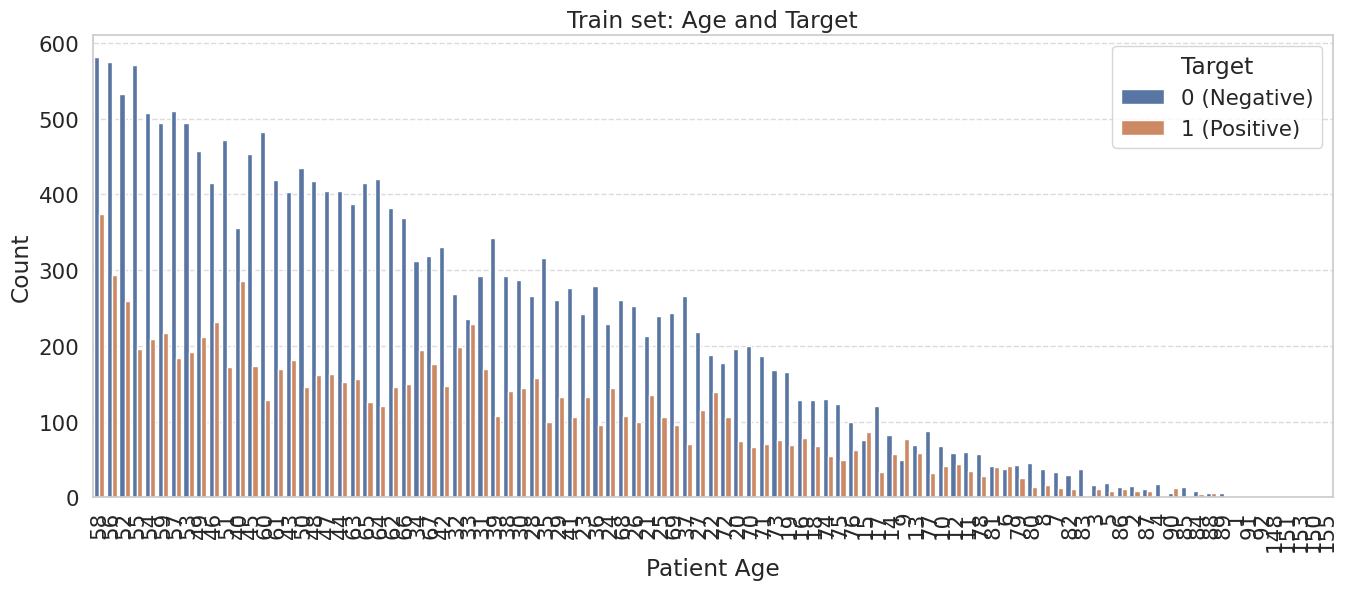

In [229]:
# Create a figure and a single subplot using 'plt.subplots' function.
# 'fig' will store the figure object, and 'ax' will store the axes object.
# Set 'nrows=1' to create a single row for subplots, and 'figsize=(16, 6)' to adjust the figure size.
fig, ax = plt.subplots(nrows=1, figsize=(16, 6))

# Create a count plot using Seaborn's 'sns.countplot' function.
# Set 'ax=ax' to specify the axes object to draw the plot on.
# Use 'x' for the 'PatientAge' column on the x-axis and 'hue' for the 'Target' column to distinguish the target values.
# 'data=traindf' specifies the DataFrame containing the data to be plotted.
# 'order=traindf['PatientAge'].value_counts().index' ensures the bars are ordered based on the count of ages.
sns.countplot(ax=ax, x='PatientAge', hue='Target', data=traindf, order=traindf['PatientAge'].value_counts().index)

# Set the title for the plot.
plt.title("Train set: Age and Target")

# Rotate the x-axis labels by 90 degrees to improve readability.
plt.xticks(rotation=90)

# Set labels for x and y-axis.
plt.xlabel("Patient Age")
plt.ylabel("Count")

# Display a legend on the plot.
plt.legend(title='Target', loc='upper right', labels=['0 (Negative)', '1 (Positive)'])

# Add grid lines to the plot for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

#### Most of the data has been captured for age group between 40 to 50. There is an outlier with age 151. There are very few data points for age group between 1 to 5 and 80 to 90.

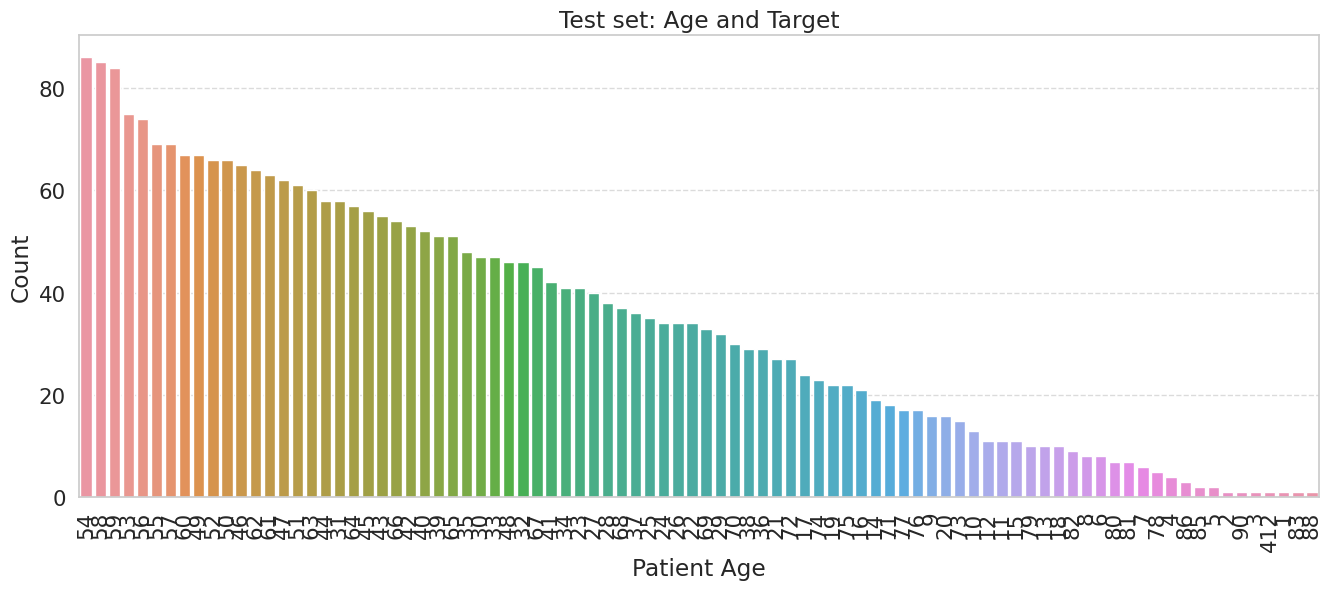

In [230]:
# Create a figure and a single subplot using 'plt.subplots' function.
# 'fig' will store the figure object, and 'ax' will store the axes object.
# Set 'nrows=1' to create a single row for subplots, and 'figsize=(16, 6)' to adjust the figure size.
fig, ax = plt.subplots(nrows=1, figsize=(16, 6))

# Create a count plot using Seaborn's 'sns.countplot' function.
# Set 'ax=ax' to specify the axes object to draw the plot on.
# Use 'x' for the 'PatientAge' column on the x-axis.
# 'data=testdf' specifies the DataFrame containing the data to be plotted.
# 'order=testdf['PatientAge'].value_counts().index' ensures the bars are ordered based on the count of ages.
sns.countplot(ax=ax, x='PatientAge', data=testdf, order=testdf['PatientAge'].value_counts().index)

# Set the title for the plot.
plt.title("Test set: Age and Target")

# Rotate the x-axis labels by 90 degrees to improve readability.
plt.xticks(rotation=90)

# Set labels for x and y-axis.
plt.xlabel("Patient Age")
plt.ylabel("Count")

# Add grid lines to the plot for better readability.
# 'axis='y'' specifies that we want to add grid lines along the y-axis.
# 'linestyle='--'' sets the style of grid lines to dashed lines, and 'alpha=0.7' sets the transparency level of the grid lines.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

#### In test set also similar kind of behaviour observed in data among different age groups. Outlier with Age 412

#### Let us check PatientSex feature

In [231]:
traindf['PatientSex'].value_counts()

M    17216
F    13011
Name: PatientSex, dtype: int64

In [232]:
testdf['PatientSex'].value_counts()

M    1714
F    1286
Name: PatientSex, dtype: int64

#### Most of the data points for Male gender both in traing and testing set .

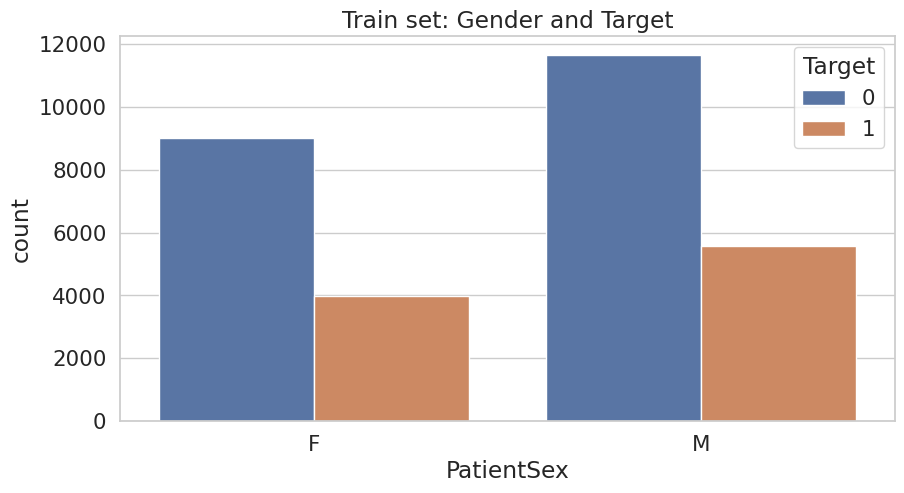

In [233]:
# The code will create a single subplot figure with 1 row and 1 column, using 'plt.subplots()'.
# The subplot figure will have a size of 10 inches in width and 5 inches in height.
fig, (ax) = plt.subplots(nrows=1, figsize=(10, 5))

# The 'sns.countplot()' function is used to create a countplot on the subplot.
# The 'x' parameter is set to 'PatientSex', which represents the column in the 'traindf' DataFrame that contains gender information.
# The 'hue' parameter is set to 'Target', which represents the column that contains the target variable (0 or 1) for each patient.
# The 'data' parameter is set to 'traindf', indicating that the data for the plot will be taken from the 'traindf' DataFrame.
sns.countplot(ax=ax, x='PatientSex', hue='Target', data=traindf)

# The 'plt.title()' function is used to set the title of the plot to "Train set: Gender and Target".
plt.title("Train set: Gender and Target")

# Finally, 'plt.show()' is called to display the plot.
plt.show()

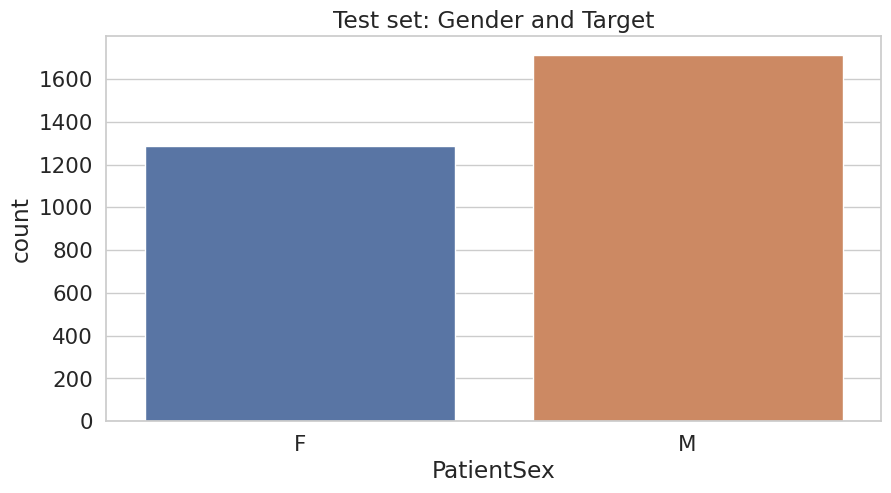

In [234]:
# The code will create a single subplot figure with 1 row and 1 column, using 'plt.subplots()'.
# The subplot figure will have a size of 10 inches in width and 5 inches in height.
fig, (ax) = plt.subplots(nrows=1, figsize=(10, 5))

# The 'sns.countplot()' function is used to create a countplot on the subplot.
# The 'x' parameter is set to 'PatientSex', which represents the column in the 'testdf' DataFrame that contains gender information.
# The 'data' parameter is set to 'testdf', indicating that the data for the plot will be taken from the 'testdf' DataFrame.
sns.countplot(ax=ax, x='PatientSex', data=testdf)

# The 'plt.title()' function is used to set the title of the plot to "Test set: Gender and Target".
plt.title("Test set: Gender and Target")

# Finally, 'plt.show()' is called to display the plot.
plt.show()

#### Let us examine BodyPartExamined feature

In [235]:
traindf['BodyPartExamined'].value_counts()

CHEST    30227
Name: BodyPartExamined, dtype: int64

In [236]:
testdf['BodyPartExamined'].value_counts()

CHEST    3000
Name: BodyPartExamined, dtype: int64

Unique values found for this column

#### Let us check ConversionType feature

In [237]:
traindf['ConversionType'].value_counts()

WSD    30227
Name: ConversionType, dtype: int64

In [238]:
testdf['ConversionType'].value_counts()

WSD    3000
Name: ConversionType, dtype: int64

Unique values found for this column

#### Let us review Rows feature

In [239]:
traindf['Rows'].value_counts()

1024    30227
Name: Rows, dtype: int64

Let us review Columns feature

In [240]:
traindf['Columns'].value_counts()

1024    30227
Name: Columns, dtype: int64

In [241]:
testdf['Rows'].value_counts(),testdf['Columns'].value_counts()

(1024    3000
 Name: Rows, dtype: int64,
 1024    3000
 Name: Columns, dtype: int64)

Unique values found.

Let us check ViewPosition

In [242]:
traindf['ViewPosition'].value_counts()

AP    15297
PA    14930
Name: ViewPosition, dtype: int64

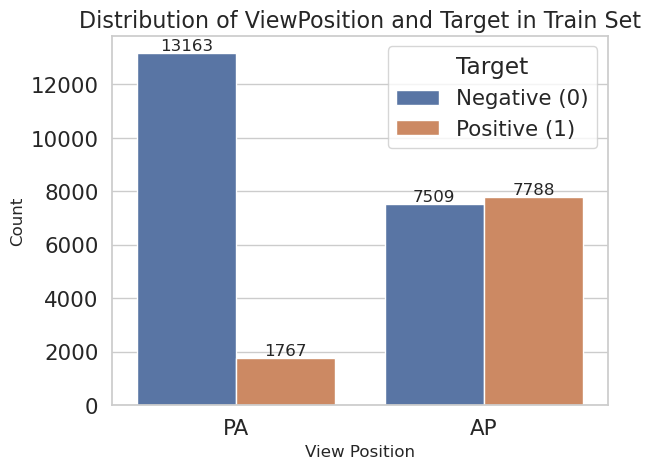

In [243]:
# Create a countplot to visualize the distribution of 'ViewPosition' column in the 'traindf' DataFrame.
# The countplot will be color-coded by the 'Target' column, representing the target label (0 or 1) in the dataset.
# The 'x' parameter is set to 'ViewPosition', indicating that the values of the 'ViewPosition' column will be displayed on the x-axis.
# The 'hue' parameter is set to 'Target', indicating that the color of each bar will be determined by the corresponding 'Target' value.
# The 'data' parameter is set to 'traindf', specifying that the data for the plot will be taken from the 'traindf' DataFrame.
ax = sns.countplot(x='ViewPosition', hue='Target', data=traindf)

# Customize the appearance of the plot
plt.title("Distribution of ViewPosition and Target in Train Set", fontsize=16)
plt.xlabel("View Position", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add annotations above each bar to display the exact count for each category and target class.
# The code iterates through each bar and its associated data to add text annotations above the bars.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Add a legend to describe the color coding for the 'Target' classes.
plt.legend(title="Target", labels=['Negative (0)', 'Positive (1)'])

# Display the plot
plt.show()

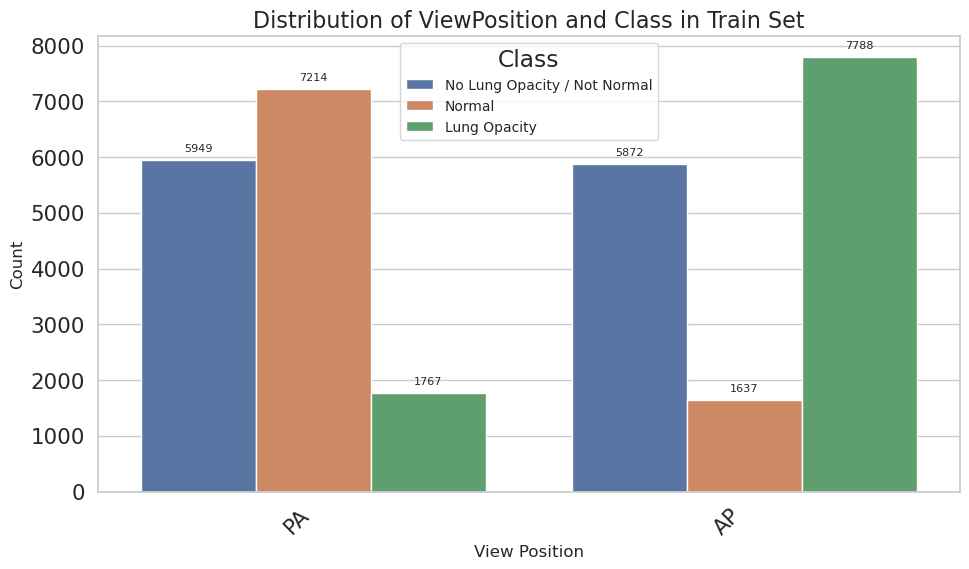

In [244]:
# Create a countplot to visualize the distribution of 'ViewPosition' column in the 'traindf' DataFrame.
# The countplot will be color-coded by the 'class' column, representing the class label (Normal, Lung Opacity, or No Lung Opacity / Not Normal) in the dataset.
# The 'x' parameter is set to 'ViewPosition', indicating that the values of the 'ViewPosition' column will be displayed on the x-axis.
# The 'hue' parameter is set to 'class', indicating that the color of each bar will be determined by the corresponding 'class' value.
# The 'data' parameter is set to 'traindf', specifying that the data for the plot will be taken from the 'traindf' DataFrame.
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='ViewPosition', hue='class', data=traindf, ax=ax)

# Customize the appearance of the plot
plt.title("Distribution of ViewPosition and Class in Train Set", fontsize=16)
plt.xlabel("View Position", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Add annotations above each bar to display the exact count for each category and class.
# The code iterates through each bar and its associated data to add text annotations above the bars.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')

# Add a legend to describe the color coding for the 'class' labels.
plt.legend(title="Class", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [245]:
# Create a label_encoder object from the LabelEncoder class.
# The label_encoder object is used to transform the categorical data in the 'ViewPosition' column into numerical labels.
# The LabelEncoder class is designed to convert categorical text data (words) into numerical representations.
label_encoder = preprocessing.LabelEncoder()

# Use the label_encoder object to encode the 'ViewPosition' column in the 'traindf' DataFrame.
# The label_encoder.fit_transform() method applies the encoding transformation to the column and returns the encoded numerical labels.
# The numerical labels represent each unique value in the 'ViewPosition' column.
traindf['ViewPosition'] = label_encoder.fit_transform(traindf['ViewPosition'])

# Print the unique classes (categories) that were encoded by the label_encoder object.
# The label_encoder.classes_ attribute contains the original unique values in the 'ViewPosition' column, which have been transformed into numerical labels.
print(label_encoder.classes_)

# Print the unique values in the 'ViewPosition' column after the encoding process.
# The 'ViewPosition' column now contains numerical labels instead of the original categorical text values.
# Each unique numerical label corresponds to a specific class in the 'ViewPosition' column.
print(traindf['ViewPosition'].unique())

['AP' 'PA']
[1 0]


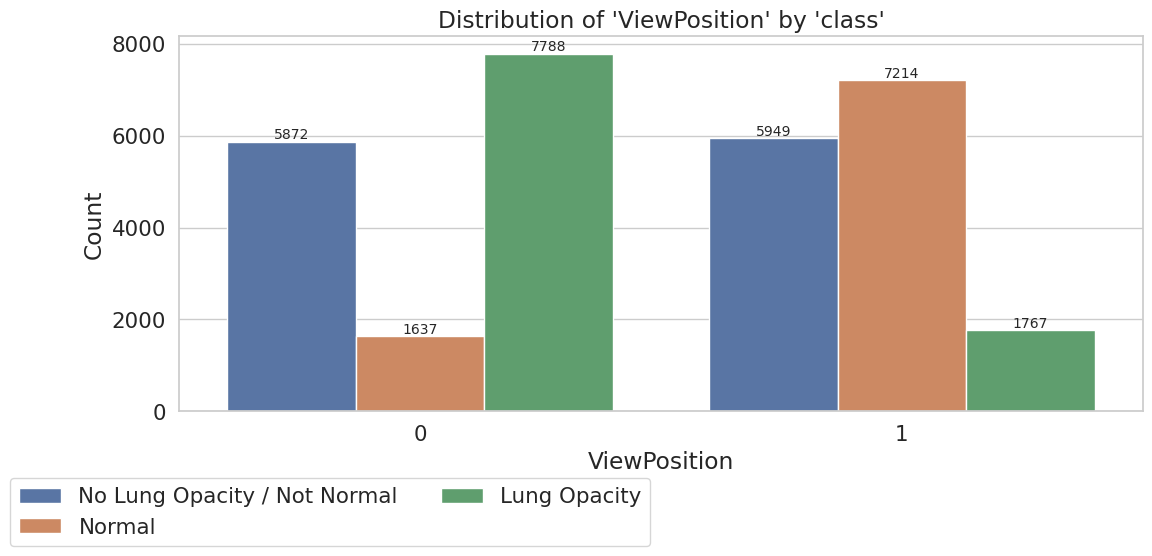

In [246]:
# Increase the figure size for better visualization
plt.figure(figsize=(12, 6))

# Create the countplot with 'ViewPosition' on the x-axis and 'class' on the hue for color differentiation.
sns.countplot(x='ViewPosition', hue='class', data=traindf)

# Set a title for the plot
plt.title("Distribution of 'ViewPosition' by 'class'")

# Move the legend to the middle to avoid overlapping with the bars
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Add annotations for the counts above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=10)

# Set labels for x and y axes
plt.xlabel('ViewPosition')
plt.ylabel('Count')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

AP-AnteriorPosterior=0 PA-PostereiorAterior=1

In [247]:
testdf['ViewPosition'].value_counts()

PA    1618
AP    1382
Name: ViewPosition, dtype: int64

In [248]:
# Create a label_encoder object, which is used to encode categorical labels as integer values.
label_encoder = preprocessing.LabelEncoder()

# Use label_encoder to transform the 'ViewPosition' column in the test dataframe from categorical labels to numerical values.
# This step is necessary for many machine learning algorithms that cannot handle categorical data directly.
testdf['ViewPosition'] = label_encoder.fit_transform(testdf['ViewPosition'])

# Print the classes that have been encoded to understand the mapping of numerical values to original categories.
print(label_encoder.classes_)

# Display the unique numerical values of the 'ViewPosition' column after label encoding.
testdf['ViewPosition'].unique()

['AP' 'PA']


array([1, 0])

Let us explore PixelSpacing feature

In [249]:
traindf['PixelSpacing'].value_counts()

0.168    10677
0.143     9221
0.139     6585
0.171     2351
0.194     1380
0.115        8
0.199        5
Name: PixelSpacing, dtype: int64

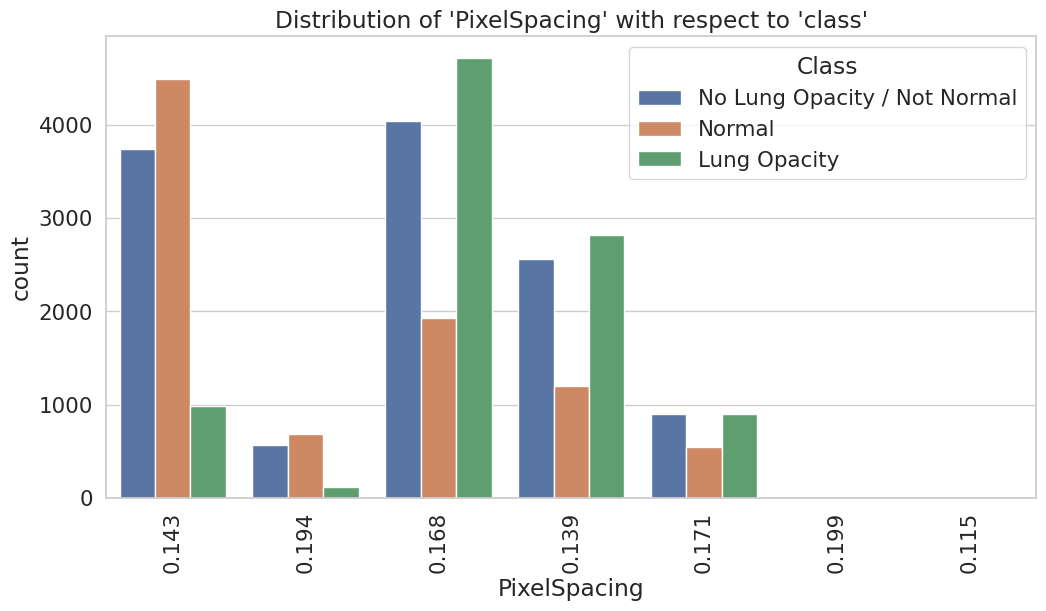

In [250]:
# Create a count plot for 'PixelSpacing' column with 'class' as hue using Seaborn's 'countplot' function.
# Set the figure size to (12, 6) to make the plot larger and avoid overlapping of labels.
fig, ax = plt.subplots(figsize=(12, 6))

# Use Seaborn's 'countplot' function to create the count plot.
sns.countplot(x='PixelSpacing', hue='class', data=traindf, ax=ax)

# Set the title for the plot.
plt.title("Distribution of 'PixelSpacing' with respect to 'class'")

# Rotate the x-axis labels to prevent overlapping.
plt.xticks(rotation=90)

# Add a legend to the plot to show the mapping of hue colors to 'class' labels.
plt.legend(title='Class', loc='upper right')

# Show the plot.
plt.show()

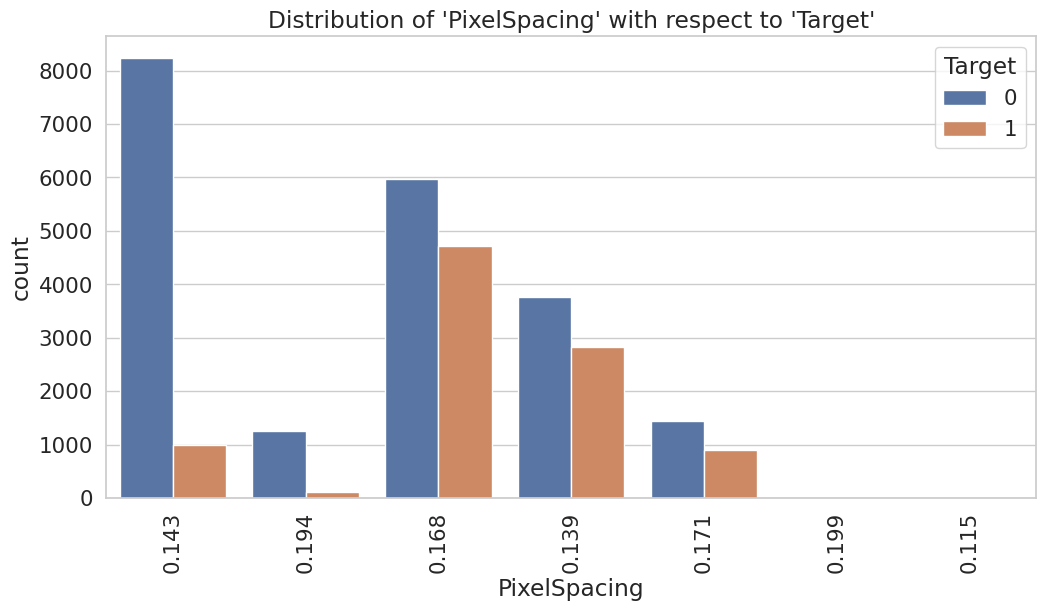

In [251]:
# Create a count plot for 'PixelSpacing' column with 'Target' as hue using Seaborn's 'countplot' function.
# Set the figure size to (12, 6) to make the plot larger and avoid overlapping of labels.
fig, ax = plt.subplots(figsize=(12, 6))

# Use Seaborn's 'countplot' function to create the count plot.
sns.countplot(x='PixelSpacing', hue='Target', data=traindf, ax=ax)

# Set the title for the plot.
plt.title("Distribution of 'PixelSpacing' with respect to 'Target'")

# Rotate the x-axis labels to prevent overlapping.
plt.xticks(rotation=90)

# Add a legend to the plot to show the mapping of hue colors to 'Target' labels.
plt.legend(title='Target', loc='upper right')

# Show the plot.
plt.show()

0.115 Pixel spacing is for age between 2-11 years. and 0.199 is from 20-35 age group. we have very less data points for this.

In [252]:
traindf[traindf['PixelSpacing']=='0.199']

patientId      x      y  width  height  Target                         class Modality PatientAge PatientSex BodyPartExamined  ViewPosition ConversionType  Rows Columns PixelSpacing
673    09714ab6-5dce-4ded-94cc-f79a47b4b171    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal       CR         25          M            CHEST             0            WSD  1024    1024        0.199
16521  9fae656b-cf66-4c4b-a5ed-1962ebcafb7d  651.0  346.0  275.0   210.0       1                  Lung Opacity       CR         38          M            CHEST             0            WSD  1024    1024        0.199
16522  9fae656b-cf66-4c4b-a5ed-1962ebcafb7d  262.0  354.0  240.0   156.0       1                  Lung Opacity       CR         38          M            CHEST             0            WSD  1024    1024        0.199
20838  bda68f49-6eb2-4afa-86bf-89a3d4378100  634.0  436.0  217.0   167.0       1                  Lung Opacity       CR         23          F            CHEST             0            WSD  1024    1024        0.199
20839  bda68f49-6eb2-4afa-86bf-89a3d4378100  389.0  395.0  142.0   181.0       1                  Lung Opacity       CR         23          F            CHEST             0            WSD  1024    1024        0.199

In [253]:
traindf[traindf['PixelSpacing']=='0.115']

patientId      x      y  width  height  Target                         class Modality PatientAge PatientSex BodyPartExamined  ViewPosition ConversionType  Rows Columns PixelSpacing
9834   6a8a2a9b-b22e-471a-8b90-3c5f6496cee6    NaN    NaN    NaN     NaN       0                        Normal       CR          6          M            CHEST             1            WSD  1024    1024        0.115
15480  9746c15f-94d1-4528-aff0-8ef02ccccef0    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal       CR          2          F            CHEST             0            WSD  1024    1024        0.115
17741  a8f16478-b36a-4bc9-ac8a-75477d8ea168    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal       CR          5          F            CHEST             1            WSD  1024    1024        0.115
21089  bf494059-4fe2-4f8f-a503-c340105e56ce    NaN    NaN    NaN     NaN       0                        Normal       CR          4          M            CHEST             1            WSD  1024    1024        0.115
22215  c908770d-5bb8-479e-9112-ff9c47d07277    NaN    NaN    NaN     NaN       0  No Lung Opacity / Not Normal       CR         11          F            CHEST             0            WSD  1024    1024        0.115
24190  d9728525-2c4b-4526-bbf7-873831872a20  227.0  474.0  250.0   200.0       1                  Lung Opacity       CR          7          F            CHEST             0            WSD  1024    1024        0.115
26339  eb2225b3-b09e-408c-8c48-27b1bad103a9  265.0  643.0  125.0   102.0       1                  Lung Opacity       CR          4          M            CHEST             0            WSD  1024    1024        0.115
28660  fd6f8775-392d-4f85-bc25-398c02a30678    NaN    NaN    NaN     NaN       0                        Normal       CR          7          M            CHEST             0            WSD  1024    1024        0.115

In [254]:
# Drop specified columns from the 'traindf' DataFrame.
# The columns to be dropped are 'Modality', 'ConversionType', 'BodyPartExamined', 'Rows', and 'Columns'.
# The DataFrame will be updated in place, and the specified columns will be removed.

traindf = traindf.drop(['Modality', 'ConversionType', 'BodyPartExamined', 'Rows', 'Columns'], axis=1)

In [255]:
# Drop specified columns from the 'testdf' DataFrame.
# The columns to be dropped are 'Modality', 'ConversionType', 'BodyPartExamined', 'Rows', and 'Columns'.
# The DataFrame will be updated in place, and the specified columns will be removed.

testdf = testdf.drop(['Modality', 'ConversionType', 'BodyPartExamined', 'Rows', 'Columns'], axis=1)

In [256]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   x             9555 non-null   float64
 2   y             9555 non-null   float64
 3   width         9555 non-null   float64
 4   height        9555 non-null   float64
 5   Target        30227 non-null  int64  
 6   class         30227 non-null  object 
 7   PatientAge    30227 non-null  object 
 8   PatientSex    30227 non-null  object 
 9   ViewPosition  30227 non-null  int64  
 10  PixelSpacing  30227 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 2.8+ MB


In [257]:
traindf[traindf['PatientAge'].isna()]

Empty DataFrame
Columns: [patientId, x, y, width, height, Target, class, PatientAge, PatientSex, ViewPosition, PixelSpacing]
Index: []

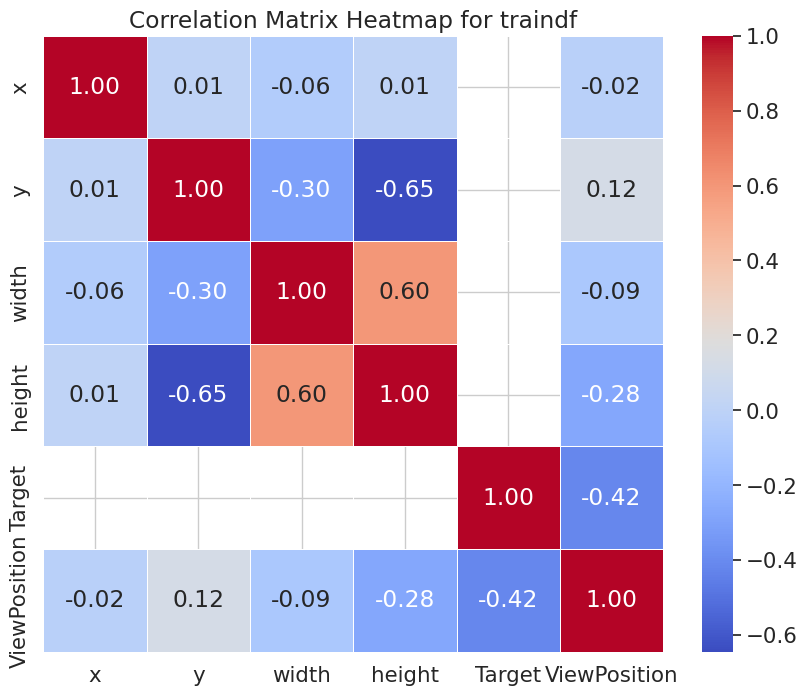

In [258]:
# Calculate the correlation matrix for the 'traindf' DataFrame.
# The correlation matrix shows the pairwise correlation between numerical columns.
correlation_matrix = traindf.corr()
# Set up the figure and axis for the heatmap plot.
fig, ax = plt.subplots(figsize=(10, 8))
# Create the heatmap using the correlation matrix.
# The 'cmap' parameter sets the color map for the heatmap (e.g., 'coolwarm', 'viridis', 'RdBu_r', etc.).
# The 'annot' parameter is set to True to display the correlation coefficients on the heatmap.
# The 'fmt' parameter is used to specify the number format for the annotations (e.g., '.2f' for two decimal places).
# The 'linewidths' parameter controls the width of the lines separating each cell.
# The 'cbar' parameter is set to True to display the color bar on the side of the heatmap.
# The 'cbar_kws' parameter is used to customize the color bar appearance (e.g., orientation, label, etc.).
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar=True, cbar_kws={'orientation': 'vertical'})

# Set the title for the heatmap plot.
plt.title('Correlation Matrix Heatmap for traindf')
# Display the heatmap.
plt.show()

y & height has highest negative correlation
width & height has highest positive correlation


# Step 6: Design, train and test basic CNN models for classification.

#### Split data into train and validation

In [259]:
# Set the path to the train images directory and the directory where the CSV file will be saved
TRAIN_PATH = trainImagesPath1
SAVE_PATH = "/kaggle/working/"

# Create an empty list to store the filenames of the images
filenames = []

# Read the directory and save the filenames to a list
filenames = os.listdir(TRAIN_PATH)

# Save the filenames to a CSV file
pd.DataFrame(filenames).to_csv(SAVE_PATH + 'train_path_listdir.csv', index=False)

# Specify the percentage of data used for training (e.g., 100% of the data)
percentage_data_used = 100

# Calculate the number of files to use based on the specified percentage
file_count = int(len(filenames) * percentage_data_used / 100)

# Print the total number of files available
print("Total files available:", file_count)

# Shuffle the list of filenames randomly to introduce randomness in the data
random.shuffle(filenames)

# Calculate the number of validation samples based on the specified percentage (30% in this case)
n_valid_samples = int(file_count * 0.3)

# Split the filenames into train and validation sets based on the number of validation samples
train_filenames = filenames[n_valid_samples:file_count]
valid_filenames = filenames[:n_valid_samples]

# Print the number of train and validation samples
print('n train samples:', len(train_filenames))
print('n valid samples:', len(valid_filenames))

# Calculate the number of train samples
n_train_samples = len(filenames) - n_valid_samples

# Set the image dimension to be used (e.g., 128x128)
image_dimension = 128

# Print the chosen image dimension and the filename of a sample image
print('Image Dimension to use:', image_dimension)
print('sample file:', filenames[0])

Total files available: 26684
n train samples: 18679
n valid samples: 8005
Image Dimension to use: 128
sample file: 6c2fb392-4762-4aa6-9878-ac6fc82ff6a1.dcm


In [260]:
# identifying if there are any files beside dcm in the folder
for name in filenames:
  le = len(name)
  if(name[le-3:le] != 'dcm'):
    print(name)

## Create a dictionary of pneumonia locations in one place.

In [261]:
# Define the project path where the CSV file is located
PROJECT_PATH = "/kaggle/input/pneumonia-detection"

# Create an empty dictionary to store pneumonia locations for each image
pneumonia_locations = {}

# Load the CSV file that contains pneumonia labels and image locations
with open(os.path.join(PROJECT_PATH, 'stage_2_train_labels.csv'), mode='r') as infile:
    # Create a CSV reader to read the contents of the file
    reader = csv.reader(infile)
    # Skip the header row of the CSV file
    next(reader, None)
    # Loop through each row in the CSV file
    for rows in reader:
        # Retrieve the filename and pneumonia location information from the current row
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]

        # Check if the current row represents a pneumonia case (indicated by pneumonia=1)
        if pneumonia == '1':
            # Convert the location values from string to float and then to integer
            location = [int(float(i)) for i in location]

            # Save the pneumonia location in the dictionary
            # If the filename is already present in the dictionary, append the location to the existing list
            # If the filename is not present in the dictionary, create a new entry with the location list
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

## Creation of Generator class

In [262]:
# Define the custom data generator class
class generator(keras.utils.Sequence):
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        # Initialize the generator with required parameters
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        # Execute this method after every epoch
        self.on_epoch_end()

    def __load__(self, filename):
        # Load DICOM file as a numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # Create an empty mask with zeros
        msk = np.zeros(img.shape)
        # Get the filename without extension
        filename = filename.split('.')[0]
        # Check if the image contains pneumonia
        if filename in self.pneumonia_locations:
            # Loop through each pneumonia location and set corresponding pixels to 1
            for location in self.pneumonia_locations[filename]:
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # Resize both image and mask to the specified image size
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # If augmentation is enabled, horizontally flip the images and masks half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # Add trailing channel dimension to the images and masks
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk

    def __loadpredict__(self, filename):
        # Check if the file is a DICOM file
        if filename.lower().endswith(".dcm"):
            # Load the DICOM file as a numpy array
            img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        else:
            # Load the image file using PIL
            img = Image.open(os.path.join(self.folder, filename))
            # Convert the image to a numpy array
            img = np.array(img)

        # Resize the image to the specified image size
        img = resize(img, (self.image_size, self.image_size), mode='reflect')

        # Normalize pixel values to a range between 0 and 1
        img /= 255.

        return img

    def __getitem__(self, index):
        # Select a batch of filenames based on the index
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # If in prediction mode, return images and filenames
        if self.predict:
            # Load files and create a numpy batch of images
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            imgs = np.array(imgs)
            return imgs, filenames
        # In training mode, return images and masks
        else:
            # Load files and create a numpy batch of images and masks
            items = [self.__load__(filename) for filename in filenames]
            imgs, msks = zip(*items)
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks

    def on_epoch_end(self):
        # If shuffle is enabled, shuffle the list of filenames after every epoch
        if self.shuffle:
            random.shuffle(self.filenames)

    def __len__(self):
        # Determine the number of batches based on the predict mode
        if self.predict:
            # Return the total number of batches to predict everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # Return the total number of full batches for training
            return int(len(self.filenames) / self.batch_size)

In [89]:
# Define the IoU (Intersection over Union) or Jaccard loss function.
# This loss function calculates the similarity between the predicted and true masks.
def iou_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score
# Combine binary cross-entropy loss and IoU loss to create a new loss function.
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)
# Define the mean IoU (Intersection over Union) as a metric.
# This metric calculates the average IoU for all predictions compared to the true masks.
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))
# Create a downsample layer using Batch Normalization, LeakyReLU activation, and 1x1 Convolution.
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x
# Create a residual block with two Convolution layers.
def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])
# Create the U-Net architecture-based neural network.
def create_network(input_size, channels, n_blocks=2, depth=4):
    # Input layer
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # Residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # Output layer
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [90]:
# Set the batch size to 128, which determines the number of samples processed in each training iteration.
BATCH_SIZE = 128

# Set the image size to 128x128 pixels, which will be used as the input size for the U-Net model.
IMAGE_SIZE = 128

# Create the U-Net model using the 'create_network' function with the specified parameters:
# input_size: The size of the input images (both width and height) for the U-Net model.
# channels: The number of channels in the initial convolutional layer of the U-Net model.
# n_blocks: The number of residual blocks to include in each downsampling stage of the U-Net.
# depth: The number of downsampling stages in the U-Net model.
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)

# Compile the U-Net model for training:
# optimizer: 'adam' is used as the optimization algorithm, which is an adaptive learning rate optimization algorithm.
# loss: The loss function used during training is 'iou_bce_loss', which combines the binary cross-entropy loss and
#       the IoU (Intersection over Union) loss to balance the segmentation performance.
# metrics: During training, the model will calculate and display the accuracy and mean IoU metrics to monitor its performance.
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

In [91]:
# Define a function 'cosine_annealing' that implements a learning rate annealing schedule based on the cosine function.
# The function takes a single argument 'x', which represents the current epoch number during training.
def cosine_annealing(x):
    lr = 0.0001  # The initial learning rate.
    epochs = 2   # The total number of epochs in the training process.
    # Calculate the learning rate using the cosine annealing formula.
    # The learning rate will start from 'lr' and decay in a cosine manner over the given number of 'epochs'.
    return lr * (np.cos(np.pi * x / epochs) + 1.) / 2

# Create a LearningRateScheduler callback, 'learning_rate', that will adjust the learning rate during training.
# The learning rate will be updated at the end of each epoch based on the 'cosine_annealing' function.
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# Assuming 'folder' is the path to the directory containing the training images.
folder = trainImagesPath1

# Create train and validation data generators using the 'generator' class.
# The 'generator' class provides data batches for training and validation during the training process.
# 'train_gen' will be used for training, and 'valid_gen' will be used for validation.
# The generators will provide data in batches of size 'BATCH_SIZE' and resize images to 'IMAGE_SIZE'.
# 'pneumonia_locations' is the dictionary containing pneumonia locations in the training data.
# 'shuffle=True' randomizes the order of data samples during training, while 'shuffle=False' keeps the validation data order unchanged.
# 'augment=False' indicates that data augmentation will not be used during training.
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)

# Print the summary of the U-Net model to get an overview of its architecture and number of parameters.
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [92]:
EPOCHS=2

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS)

Epoch 1/2
145/145 [==============================] - 2518s 17s/step - loss: 0.5222 - accuracy: 0.9343 - mean_iou: 0.6338 - val_loss: 0.4507 - val_accuracy: 0.9637 - val_mean_iou: 0.6920 - lr: 1.0000e-04
Epoch 2/2
145/145 [==============================] - 2443s 17s/step - loss: 0.4437 - accuracy: 0.9673 - mean_iou: 0.7150 - val_loss: 0.4342 - val_accuracy: 0.9679 - val_mean_iou: 0.7326 - lr: 5.0000e-05


## 2. Milestone 2:

#### Input: 
Preprocessed output from Milestone-1

#### Process:
‣ Step 1: Fine tune the trained basic CNN models for classification.

‣ Step 2: Apply Transfer Learning model for classification

‣ Step 3: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.

‣ Step 4: Pickle the model for future prediction

‣ Step 5: Final Report

### Submission: 
Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2

#### From the above code, we could not print Confusion Matrix as the shape of y_true & y_pred #are different.
#### We shall continue to conduct testing on other models and check accuracy of different classes with confusion matrix

In [263]:
## Sampling 5000 from the dataset. This shall be used to design and evaluate the models
sample_trainingdata = traindf.groupby('class', group_keys=False).apply(lambda x: x.sample(1000))

In [264]:
sample_trainingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6634 to 22604
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     3000 non-null   object 
 1   x             1000 non-null   float64
 2   y             1000 non-null   float64
 3   width         1000 non-null   float64
 4   height        1000 non-null   float64
 5   Target        3000 non-null   int64  
 6   class         3000 non-null   object 
 7   PatientAge    3000 non-null   object 
 8   PatientSex    3000 non-null   object 
 9   ViewPosition  3000 non-null   int64  
 10  PixelSpacing  3000 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 281.2+ KB


In [265]:
# Initialize lists and variables for image processing
images = []
ADJUSTED_IMAGE_SIZE = 128
imageList = []
classLabels = []
labels = []
originalImage = []

# Function to read the image from the path and resize it
def readAndReshapeImage(image):
    img = np.array(image).astype(np.uint8)
    # Resize the image to ADJUSTED_IMAGE_SIZE
    res = cv2.resize(img, (ADJUSTED_IMAGE_SIZE, ADJUSTED_IMAGE_SIZE), interpolation=cv2.INTER_LINEAR)
    return res

# Function to read and resize the images in the dataset
def populateImage(rowData):
    for index, row in rowData.iterrows():
        patientId = row.patientId
        classlabel = row["class"]
        dcm_file = "/kaggle/input/pneumonia-detection/stage_2_train_images/stage_2_train_images/" + '{}.dcm'.format(patientId)
        dcm_data = pydicom.dcmread(dcm_file)
        img = dcm_data.pixel_array
        # Convert the image to 3 channels as the DICOM image pixel does not have color classes
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = np.stack((img,) * 3, -1)
        # Append the resized image to the imageList
        imageList.append(readAndReshapeImage(img))
        classLabels.append(classlabel)
    # Convert lists to numpy arrays and return
    tmpImages = np.array(imageList)
    tmpLabels = np.array(classLabels)
    return tmpImages, tmpLabels

In [266]:
## Reading the images into numpy array
images,labels = populateImage(sample_trainingdata)

In [267]:
images.shape , labels.shape
## The image is of 128*128 with 3 channels

((3000, 128, 128, 3), (3000,))

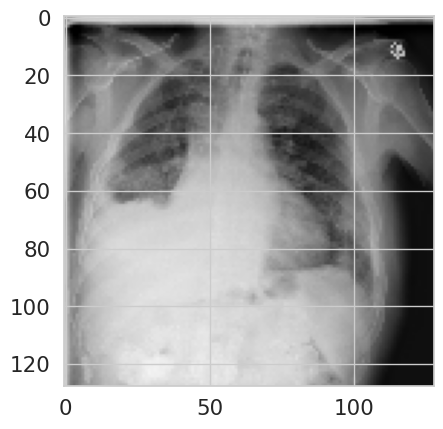

In [268]:
## Checking one of the converted image 
plt.imshow(images[10]);

In [269]:
## check the unique labels
np.unique(labels),len(np.unique(labels))

(array(['Lung Opacity', 'No Lung Opacity / Not Normal', 'Normal'],
       dtype='<U28'),
 3)

In [270]:
# Create an instance of the LabelBinarizer class
enc = LabelBinarizer()

# Encode the labels using one-hot encoding
# This converts the class labels into binary format where each class is represented as a binary vector
# For example, if there are three classes ['cat', 'dog', 'bird'], the encoding will be:
# cat -> [1, 0, 0]
# dog -> [0, 1, 0]
# bird -> [0, 0, 1]
# The result 'y2' will be a numpy array containing the encoded labels
y2 = enc.fit_transform(labels)

#### Splitting data into Train & Test Sets

In [271]:
# Splitting the data into train, test, and validation sets
# X_train: Training images
# X_test: Testing images
# X_val: Validation images
# y_train: Training labels (encoded using one-hot encoding)
# y_test: Testing labels (encoded using one-hot encoding)
# y_val: Validation labels (encoded using one-hot encoding)

# Split the images and labels into training and testing sets using a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(images, y2, test_size=0.3, random_state=50)

# Further split the testing set into testing and validation sets using a test size of 50%
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=50)

In [272]:
# Function to create a DataFrame to store the results of different methods or models.
# The DataFrame will have columns for the method name, accuracy, and test score.

def createResultDf(name, accuracy, testscore):
    # Create a DataFrame with one row containing the results for a specific method or model.
    # The 'name' parameter represents the name of the method or model.
    # The 'accuracy' parameter represents the accuracy achieved by the method or model on the validation set.
    # The 'testscore' parameter represents the score or performance of the method or model on the test set.
    result = pd.DataFrame({'Method': [name], 'accuracy': [accuracy], 'Test Score': [testscore]})
    return result

### Base Model

In [153]:
def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
    # Create a Sequential model, which is a linear stack of layers.
    model = Sequential()

    # Add the first Conv2D layer with 1 filter, kernel size of (5, 5), 'Same' padding, 'relu' activation,
    # and input shape defined by (height, width, num_channels).
    model.add(Conv2D(filters=1, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(height, width, num_channels)))

    # Add the second Conv2D layer with 32 filters, kernel size of (5, 5), 'Same' padding, and 'relu' activation.
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))

    # Add a MaxPooling2D layer with a pool size of (2, 2) to downsample the spatial dimensions.
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add two more Conv2D layers with 64 filters, kernel size of (3, 3), 'Same' padding, and 'relu' activation.
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

    # Add another MaxPooling2D layer with a pool size of (2, 2) and a stride of (2, 2).
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Add two more Conv2D layers with 128 filters, kernel size of (3, 3), 'Same' padding, and 'relu' activation.
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))

    # Add a GlobalMaxPooling2D layer to reduce the spatial dimensions to a single value per feature map.
    model.add(GlobalMaxPooling2D())

    # Add a Dense layer with 256 units and 'relu' activation.
    model.add(Dense(256, activation="relu"))

    # Add the output Dense layer with num_classes units and 'softmax' activation for multi-class classification.
    model.add(Dense(num_classes, activation="softmax"))

    # Create an Adam optimizer with learning rate 0.001.
    optimizer = Adam(learning_rate=0.001)

    # Compile the model with the specified loss function and evaluation metrics.
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    # Print the model summary to show the model architecture and the number of trainable parameters.
    model.summary()
    # Return the compiled model.
    return model

In [154]:
# Model Summary
cnn = cnn_model(ADJUSTED_IMAGE_SIZE,ADJUSTED_IMAGE_SIZE,3,3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 1)       76        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [155]:
# Training for 25 epocs with batch size of 32
history = cnn.fit(X_train,y_train,epochs = 25,validation_data = (X_val,y_val),batch_size = 32)

Epoch 1/25
66/66 [==============================] - 8s 50ms/step - loss: 1.1487 - accuracy: 0.3657 - val_loss: 1.0739 - val_accuracy: 0.4422
Epoch 2/25
66/66 [==============================] - 2s 29ms/step - loss: 1.0733 - accuracy: 0.4014 - val_loss: 1.0997 - val_accuracy: 0.3933
Epoch 3/25
66/66 [==============================] - 2s 30ms/step - loss: 1.0458 - accuracy: 0.4386 - val_loss: 1.0120 - val_accuracy: 0.5356
Epoch 4/25
66/66 [==============================] - 2s 29ms/step - loss: 1.0077 - accuracy: 0.4790 - val_loss: 1.0059 - val_accuracy: 0.5422
Epoch 5/25
66/66 [==============================] - 2s 32ms/step - loss: 0.9880 - accuracy: 0.4895 - val_loss: 1.0073 - val_accuracy: 0.5311
Epoch 6/25
66/66 [==============================] - 2s 29ms/step - loss: 0.9607 - accuracy: 0.5300 - val_loss: 1.0340 - val_accuracy: 0.5111
Epoch 7/25
66/66 [==============================] - 2s 29ms/step - loss: 0.9415 - accuracy: 0.5238 - val_loss: 1.0185 - val_accuracy: 0.4667
Epoch 8/25
66

In [156]:
fcl_loss, fcl_accuracy = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss: {:.2f}'.format(fcl_loss))
print('Test accuracy: {:.2f}'.format(fcl_accuracy*100),'%')

15/15 [==============================] - 0s 12ms/step - loss: 2.4070 - accuracy: 0.4889
Test loss: 2.41
Test accuracy: 48.89 %


#### Training accuracy is about40% & Test accuracy is about 39%. 
#### This is very low. Let us try other pretrained models such as VGG16,Resnet50,Unet & RCNN

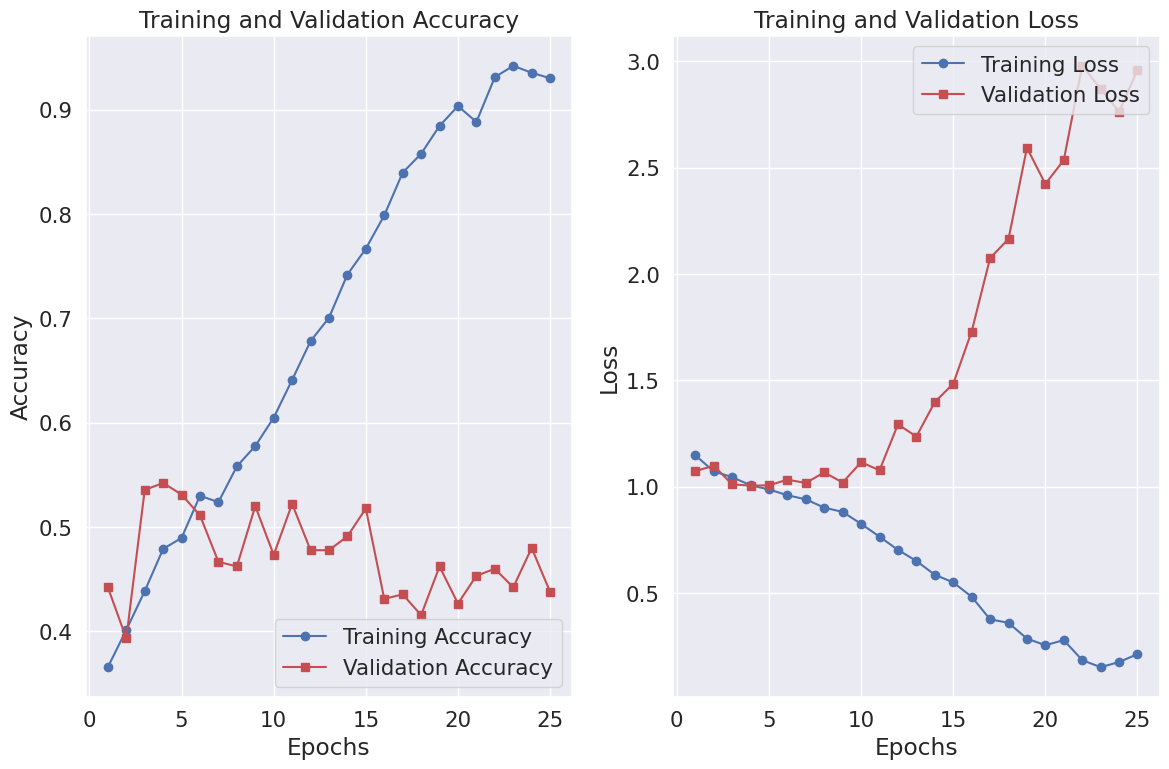

In [157]:
# Extract the training accuracy, validation accuracy, training loss, and validation loss from the history dictionary
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs from the history object
epochs_range = range(1, len(acc) + 1)
# Create a 2x2 grid of subplots for displaying the accuracy and loss graphs
plt.figure(figsize=(12, 8))
# Plot the training accuracy and validation accuracy over the range of epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='b', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='r', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
# Plot the training loss and validation loss over the range of epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='b', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='r', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

In [158]:
# Create a DataFrame to store the results of the Convolutional Neural Network (CNN) model.
# The 'Method' column will contain the name of the model (in this case, "CNN").
# The 'accuracy' column will store the accuracy obtained from the training phase (last epoch).
# The 'Test Score' column will store the accuracy obtained from evaluating the model on the test dataset.
resultDF = createResultDf("CNN", acc[-1], fcl_accuracy)

15/15 [==============================] - 0s 9ms/step


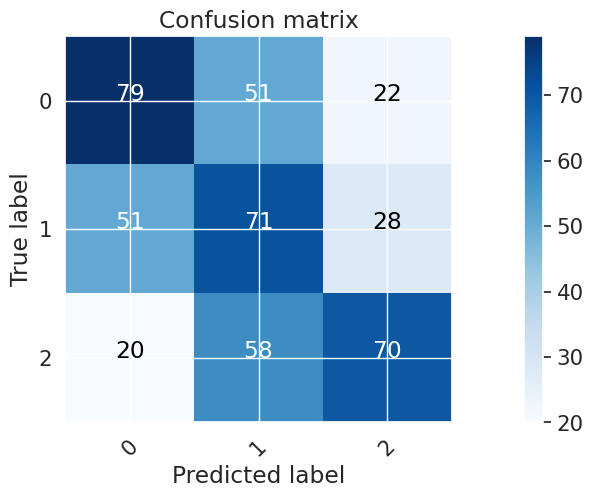

In [159]:
# Set the size of the plot
plt.subplots(figsize=(15, 5))

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Plot the confusion matrix as an image with the specified colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # Set the class labels as x-ticks and y-ticks with rotation for better visibility
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize the confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Determine the threshold to set text color in the plot
    thresh = cm.max() / 2.
    # Add text annotations to the plot, showing the values in each cell of the confusion matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1) 
# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(3))

# Class 0, 1, and 2
# Class 0 is Lung Opacity
# Class 1 is No Lung Opacity/Normal, the model has predicted mostly wrong in this case to the Target 0. Type 2 error
# Class 2 is Normal

15/15 [==============================] - 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       152
           1       0.39      0.47      0.43       150
           2       0.58      0.47      0.52       148

    accuracy                           0.49       450
   macro avg       0.50      0.49      0.49       450
weighted avg       0.50      0.49      0.49       450



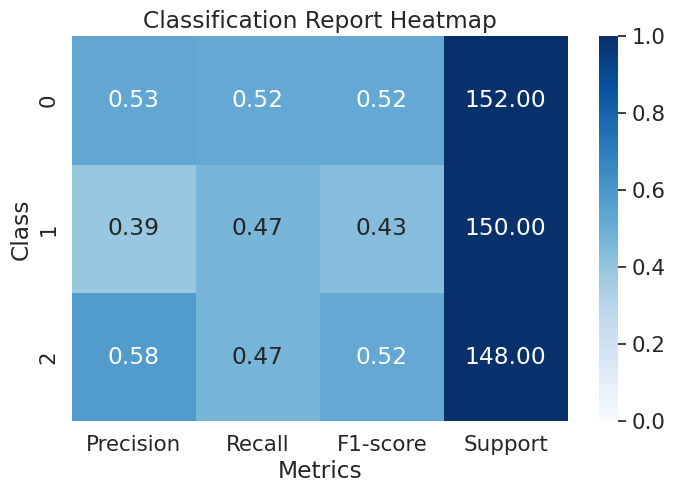

In [160]:
# Predict the values from the validation dataset
Y_pred = cnn.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1) 
# Get the classification report as a string
class_report = classification_report(Y_true, Y_pred_classes)
print("Classification Report:")
print(class_report)
# Convert the classification report string to a DataFrame for visualization
report_data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.split()
    report_data.append(row)
df_report = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-score', 'Support'])
df_report = df_report.set_index('Class')
# Convert the metrics to numeric values for visualization
df_report = df_report.astype(float)
# Create a heatmap of the classification report
plt.figure(figsize=(8, 5))
sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f', vmin=0, vmax=1)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [161]:
# Convert validation observations to one hot vectors
Y_truepred = np.argmax(y_test, axis=1)

# Predict the values from the validation dataset
Y_testPred = cnn.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate a classification report as a dictionary
reportData = classification_report(Y_truepred, Y_pred_classes, output_dict=True)

# Iterate over the data in the classification report
for data in reportData:
    # Check if the data is related to class -1 or 1 (binary classification)
    if data == '-1' or data == '1':
        # Check if the data is a dictionary (contains precision, recall, f1-score, etc.)
        if type(reportData[data]) is dict:
            # Iterate over the sub-data (precision, recall, f1-score, etc.) in the dictionary
            for subData in reportData[data]:
                # Add the sub-data to the result DataFrame with appropriate column names
                value = round(reportData[data][subData], 2)  # Round to 2 decimals
                resultDF[data + "_" + subData] = value
                
resultDF
# The resultDF DataFrame contains the metrics for class -1 and 1 in binary classification
# These metrics include precision, recall, f1-score, support, etc.

15/15 [==============================] - 0s 8ms/step


Method  accuracy  Test Score  1_precision  1_recall  1_f1-score  1_support
0    CNN      0.93    0.488889         0.39      0.47        0.43        150

In [162]:
# Creating copies of the datasets

# Copy the training dataset (X_train) to X_train1
X_train1 = X_train.copy()

# Copy the validation dataset (X_val) to X_val1
X_val1 = X_val.copy()

# Copy the test dataset (X_test) to X_test1
X_test1 = X_test.copy()

# Now you have new arrays X_train1, X_val1, and X_test1, which are copies of the original datasets
# You can perform operations or transformations on these new arrays without modifying the original data

# CNN Model with Transfer learning using VGG16

In [101]:
# VGG16 is a well-documented and widely used convolutional neural network architecture
# Setting include_top=False removes the classification layer that was trained on the ImageNet dataset
# The input_shape parameter is set to the shape of the training data samples (X_train[0].shape)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)

# Set the base model's weights as not trainable
base_model.trainable = False

# Preprocess the input data using the VGG16 preprocess_input function
# This function applies necessary transformations to the input data to be compatible with VGG16
# The training dataset is preprocessed and stored in train_ds
# The validation dataset is preprocessed and stored in train_val_df
train_ds = preprocess_input(X_train1) 
train_val_df = preprocess_input(X_val1)

58889256/58889256 [==============================] - 0s 0us/step


In [102]:
# Define a flatten layer to convert the 2D feature maps to a 1D vector
flatten_layer = layers.Flatten()
# Define the first dense (fully connected) layer with 50 units and ReLU activation function
dense_layer_1 = layers.Dense(50, activation='relu')
# Define the second dense (fully connected) layer with 20 units and ReLU activation function
dense_layer_2 = layers.Dense(20, activation='relu')
# Define the prediction layer with 3 units (for 3 classes) and softmax activation function
prediction_layer = layers.Dense(3, activation='softmax')

# Create the CNN model using a Sequential model
# Add the base_model (pre-trained VGG16) followed by the defined layers
cnn_VGG16_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [103]:
# Compile the CNN model with the Adam optimizer, binary cross-entropy loss, and accuracy metric
cnn_VGG16_model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
# Create an EarlyStopping callback to stop training when validation accuracy doesn't improve for 7 iterations
# The monitor 'val_accuracy' tracks validation accuracy, mode 'auto' selects the direction to monitor for improvement
# Patience is set to 7, which means training will stop after 7 epochs without improvement
# restore_best_weights=True restores the weights of the model to the best observed during training
es = EarlyStopping(monitor='val_accuracy', mode='auto', patience=7, restore_best_weights=True)
# Train the model using the fit() method
# The training data is provided as 'train_ds' and the target labels as 'y_train'
# Validation data is provided as 'train_val_df' and validation target labels as 'y_val'
# The fit() method will use the EarlyStopping callback to monitor validation accuracy and stop training if needed
history_VGG16 = cnn_VGG16_model.fit(train_ds, y_train, epochs=30, validation_data=(train_val_df, y_val), callbacks=es)

Epoch 1/30
66/66 [==============================] - 17s 92ms/step - loss: 0.7799 - accuracy: 0.3362 - val_loss: 0.6864 - val_accuracy: 0.2933
Epoch 2/30
66/66 [==============================] - 3s 50ms/step - loss: 0.6809 - accuracy: 0.3448 - val_loss: 0.6772 - val_accuracy: 0.2933
Epoch 3/30
66/66 [==============================] - 3s 51ms/step - loss: 0.6730 - accuracy: 0.3467 - val_loss: 0.6703 - val_accuracy: 0.2956
Epoch 4/30
66/66 [==============================] - 3s 52ms/step - loss: 0.6644 - accuracy: 0.3505 - val_loss: 0.6654 - val_accuracy: 0.2933
Epoch 5/30
66/66 [==============================] - 3s 52ms/step - loss: 0.6651 - accuracy: 0.3510 - val_loss: 0.6597 - val_accuracy: 0.2933
Epoch 6/30
66/66 [==============================] - 3s 51ms/step - loss: 0.6579 - accuracy: 0.3452 - val_loss: 0.6554 - val_accuracy: 0.2933
Epoch 7/30
66/66 [==============================] - 3s 51ms/step - loss: 0.6491 - accuracy: 0.3476 - val_loss: 0.6462 - val_accuracy: 0.3067
Epoch 8/30
6

In [104]:
# Preprocess the input test data using the VGG16 preprocessing function
test_ds = preprocess_input(X_test1) 

# Evaluate the CNN VGG16 model on the preprocessed test data and target labels
vgg16_loss, vgg16_accuracy = cnn_VGG16_model.evaluate(test_ds, y_test, verbose=1)

# Print the test loss and accuracy scores with two decimal places
print('Test loss for VGG16 trained Model: {:.2f}'.format(vgg16_loss))
print('Test accuracy for VGG16 trained Model: {:.2f}'.format(vgg16_accuracy*100),'%')

15/15 [==============================] - 1s 42ms/step - loss: 0.6535 - accuracy: 0.3333
Test loss for VGG16 trained Model: 0.65
Test accuracy for VGG16 trained Model: 33.33 %


In [163]:
# Concatenate two DataFrames: 'resultDF' and the DataFrame created by the 'createResultDf' function
# The DataFrame 'resultDF' should already contain the evaluation metrics for the previous model (CNN)
# The 'createResultDf' function is used to create a DataFrame for the current model (CNN with VGG16)

# The first DataFrame 'resultDF' contains the evaluation metrics for the previous model (CNN)
# The second DataFrame is created using the 'createResultDf' function, which takes three parameters:
#     - The title "CNN With VGG16"
#     - The accuracy of the previous model (0.99)
#     - The accuracy of the current model (fcl_accuracy, which is the test accuracy of the CNN with VGG16 model)

# The 'pd.concat' function is used to concatenate the two DataFrames vertically, resulting in a single DataFrame containing evaluation metrics for both models

resultsDf1 = pd.concat([resultDF, createResultDf("CNN With VGG16", 0.6992, vgg16_accuracy)])

In [164]:
resultsDf1

Method  accuracy  Test Score  1_precision  1_recall  1_f1-score  1_support
0             CNN    0.9300    0.488889         0.39      0.47        0.43      150.0
0  CNN With VGG16    0.6992    0.333333          NaN       NaN         NaN        NaN

## CNN with ResNet50

In [107]:
# Load the ResNet50 base model with pre-trained weights from ImageNet dataset
# Set include_top=False to exclude the classification layers and input_shape as the shape of your input images
resnet_base_model = ResNet50(include_top=False, weights='imagenet', input_shape=X_train[0].shape)

# Preprocess the training and validation data using the ResNet50 preprocessing function
train_ds_Resnet = preprocess_input(X_train1) 
train_val_df_Resnet = preprocess_input(X_val1)

# Define the additional layers for your custom classification model
# Flatten layer to convert 3D feature maps to 1D
flatten_layer = layers.Flatten()

# Dense layers with ReLU activation function
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')

# Output layer with softmax activation for multi-class classification (3 classes)
prediction_layer = layers.Dense(3, activation='softmax')

# Create the custom CNN model by stacking the base model and additional layers
cnn_resnet_model = models.Sequential([
    resnet_base_model,   # Include the ResNet50 base model
    flatten_layer,       # Flatten layer
    dense_layer_1,       # Dense layer 1 with ReLU activation
    dense_layer_2,       # Dense layer 2 with ReLU activation
    prediction_layer     # Output layer with softmax activation
])

94765736/94765736 [==============================] - 2s 0us/step


In [108]:
# Compile the CNN model with the specified optimizer, loss function, and evaluation metrics
cnn_resnet_model.compile(
    optimizer='Adam',   # Adam optimizer with default learning rate
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),   # BinaryCrossentropy loss function for multi-class classification
    metrics=['accuracy']   # Evaluation metric - accuracy
)

# Train the CNN model on the preprocessed training data for 30 epochs
# Use the validation data for monitoring model performance during training
history_resnet = cnn_resnet_model.fit(
    train_ds_Resnet,   # Preprocessed training data
    y_train,    # Target labels for training data
    epochs=30,  # Number of training epochs
    validation_data=(train_val_df_Resnet, y_val)  # Validation data for monitoring model performance
)

Epoch 1/30
66/66 [==============================] - 60s 183ms/step - loss: 0.6302 - accuracy: 0.5910 - val_loss: 3.8687 - val_accuracy: 0.3111
Epoch 2/30
66/66 [==============================] - 8s 123ms/step - loss: 0.4674 - accuracy: 0.6676 - val_loss: 1.6082 - val_accuracy: 0.4022
Epoch 3/30
66/66 [==============================] - 8s 121ms/step - loss: 0.4385 - accuracy: 0.6648 - val_loss: 1.1246 - val_accuracy: 0.5867
Epoch 4/30
66/66 [==============================] - 8s 122ms/step - loss: 0.4266 - accuracy: 0.6924 - val_loss: 0.6540 - val_accuracy: 0.6289
Epoch 5/30
66/66 [==============================] - 8s 123ms/step - loss: 0.3908 - accuracy: 0.7205 - val_loss: 0.4493 - val_accuracy: 0.6533
Epoch 6/30
66/66 [==============================] - 8s 125ms/step - loss: 0.3583 - accuracy: 0.7557 - val_loss: 1.3837 - val_accuracy: 0.5667
Epoch 7/30
66/66 [==============================] - 8s 125ms/step - loss: 0.3676 - accuracy: 0.7467 - val_loss: 3.9079 - val_accuracy: 0.3889
Epoch

In [109]:
# Preprocess the input test data using the VGG16 preprocessing function
test_ds_Resnet = preprocess_input(X_test1) 

# Evaluate the Resnet model on the preprocessed test data and target labels
Resnet_loss, Resnet_accuracy = cnn_resnet_model.evaluate(test_ds_Resnet, y_test, verbose=1)

# Print the test loss and accuracy scores with two decimal places
print('Test loss for Resnet trained Model: {:.2f}'.format(Resnet_loss))
print('Test accuracy for Resnet trained Model: {:.2f}'.format(Resnet_accuracy*100),'%')

15/15 [==============================] - 1s 39ms/step - loss: 0.9397 - accuracy: 0.6289
Test loss for Resnet trained Model: 0.94
Test accuracy for Resnet trained Model: 62.89 %


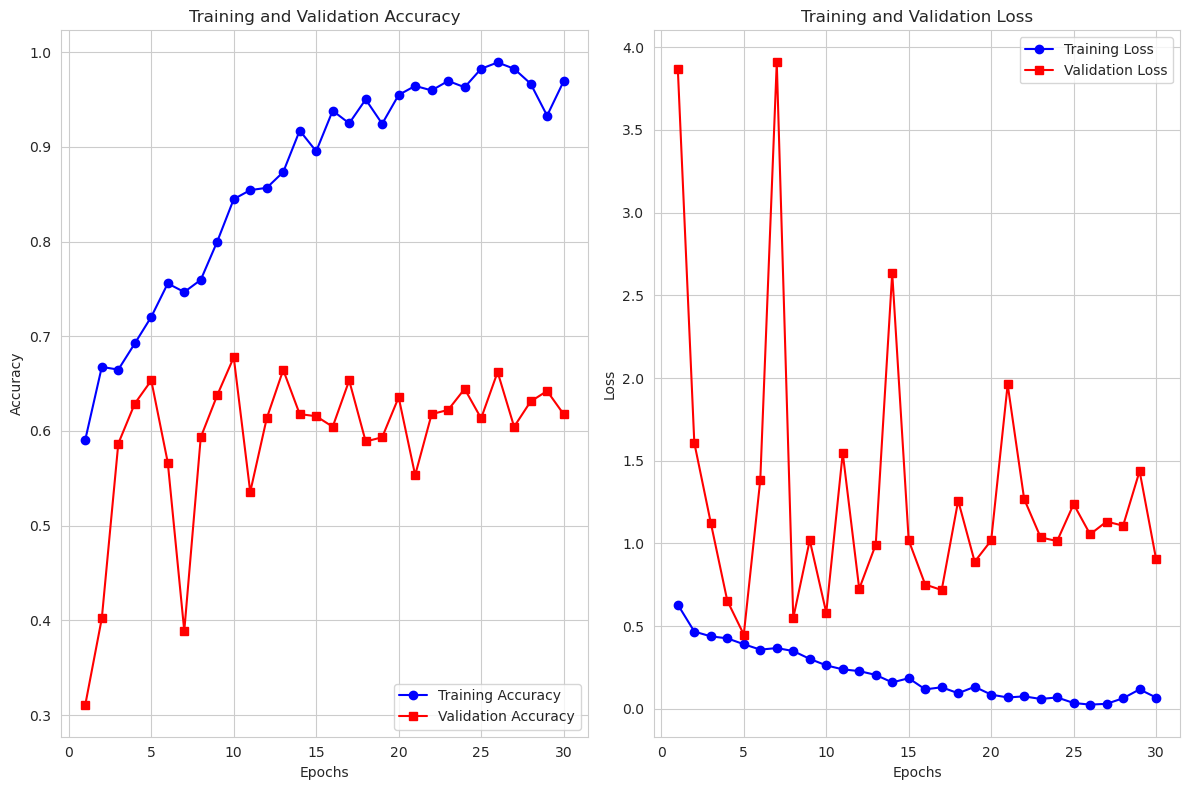

In [110]:
# Extract the training accuracy, validation accuracy, training loss, and validation loss from the history dictionary
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

# Get the number of epochs from the history object
epochs_range = range(1, len(acc) + 1)

# Create a 2x2 grid of subplots for displaying the accuracy and loss graphs
plt.figure(figsize=(12, 8))

# Plot the training accuracy and validation accuracy over the range of epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='b', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='r', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot the training loss and validation loss over the range of epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='b', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='r', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

15/15 [==============================] - 2s 38ms/step


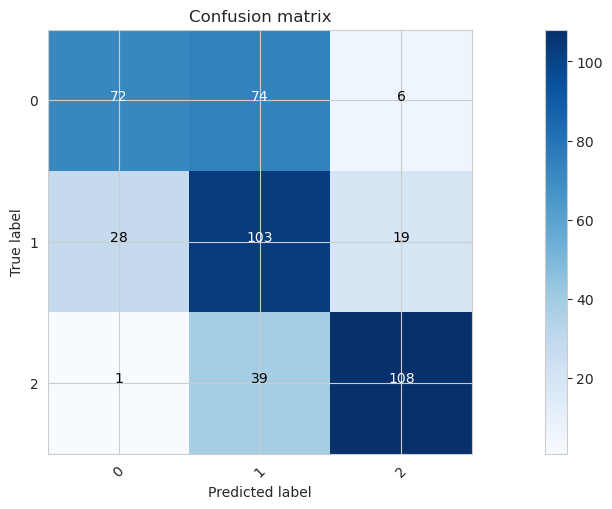

In [111]:
# Set the size of the plot
plt.subplots(figsize=(15, 5))

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # Display the confusion matrix as an image with a colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Set the title of the plot
    plt.colorbar()    # Add a color bar to the plot
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # Set the labels for the x-axis
    plt.yticks(tick_marks, classes)              # Set the labels for the y-axis

    if normalize:
        # Normalize the confusion matrix to show relative proportions
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Add text annotations to the cells of the confusion matrix
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()    # Adjust the layout to prevent overlapping of elements
    plt.ylabel('True label')   # Set the label for the y-axis
    plt.xlabel('Predicted label')  # Set the label for the x-axis

# Predict the values from the validation dataset using the trained CNN model
Y_pred_Resnet = cnn_resnet_model.predict(test_ds_Resnet)
# Convert predicted probabilities to class labels
Y_pred_classes_Resnet = np.argmax(Y_pred_Resnet, axis=1) 
# Convert true class labels to one hot vectors
Y_true_Resnet = np.argmax(y_test, axis=1) 
# Compute the confusion matrix
confusion_mtx_Resnet = confusion_matrix(Y_true_Resnet, Y_pred_classes_Resnet) 
# Plot the confusion matrix using the defined function
plot_confusion_matrix(confusion_mtx_Resnet, classes=range(3))

In [112]:
print(classification_report(Y_true_Resnet, Y_pred_classes_Resnet))

              precision    recall  f1-score   support

           0       0.71      0.47      0.57       152
           1       0.48      0.69      0.56       150
           2       0.81      0.73      0.77       148

    accuracy                           0.63       450
   macro avg       0.67      0.63      0.63       450
weighted avg       0.67      0.63      0.63       450



In [273]:
labels = pd.read_csv("/kaggle/input/pneumonia-detection/stage_2_train_labels.csv")

In [274]:
# Getting the first 5000 data points for training and the next 5000 for validation
train_CombinedData = labels[0:5000]
validate_CombinedData = labels[5000:10000]

# Filling any missing values in the training and validation datasets with 0
train_CombinedData.fillna(0, inplace=True)
validate_CombinedData.fillna(0, inplace=True)

In [275]:
# Checking training data distuburtion , they have almos the same target distubution
train_CombinedData.Target.value_counts()

0    2633
1    2367
Name: Target, dtype: int64

### Creating Custom Train Generator. This will read the files in batches of 10 while training the model

In [276]:
BATCH_SIZE = 10
## Image Size to be scaled
IMAGE_SIZE = 224
## Actual Image size 
IMG_WIDTH = 1024
IMG_HEIGHT = 1024

class TrainGenerator(Sequence):
    def __init__(self,  _labels):       
        self.pids = _labels["patientId"].to_numpy()
        self.coords = _labels[["x", "y", "width", "height"]].to_numpy()
        self.coords = self.coords * IMAGE_SIZE / IMG_WIDTH      
    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)
    def __doHistogramEqualization(self,img):
        # Pre processing Histogram equalization
        histogram_array = np.bincount(img.flatten(), minlength=256)
        #normalize
        num_pixels = np.sum(histogram_array)
        histogram_array = histogram_array/num_pixels
        #normalized cumulative histogram
        chistogram_array = np.cumsum(histogram_array)
        """
        STEP 2: Pixel mapping lookup table
        """
        transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
        """
        STEP 3: Transformation
        """
        img_list = list(img.flatten())
        # transform pixel values to equalize
        eq_img_list = [transform_map[p] for p in img_list]
        # reshape and write back into img_array
        img = np.reshape(np.asarray(eq_img_list), img.shape)
        return img
    def __getitem__(self, idx): # Get a batch
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image coords
        batch_pids = self.pids[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image pids    
        
        batch_images = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        batch_masks = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE))
        for _indx, _pid in enumerate(batch_pids):
            _path =  '/kaggle/input/pneumonia-detection/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format(_pid)
            _imgData = pydicom.dcmread(_path)
            img = _imgData.pixel_array 
            # img = np.stack((img,)*3, axis=-1) # Expand grayscale image to contain 3 channels
            # Resize image
            resized_img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE), interpolation = cv2.INTER_AREA)            
            resized_img = self.__doHistogramEqualization(resized_img)        
            batch_images[_indx][:,:,0] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32)) 
            batch_images[_indx][:,:,1] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32)) 
            batch_images[_indx][:,:,2] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32)) 
            x = int(batch_coords[_indx, 0])
            y = int(batch_coords[_indx, 1])
            width = int(batch_coords[_indx, 2])
            height = int(batch_coords[_indx, 3])
            
            batch_masks[_indx][y:y+height, x:x+width] = 1

        return batch_images, batch_masks

In [277]:
# Create a TrainGenerator instance for training data
# 'train_CombinedData' is a DataFrame containing information about the first 5000 data points for training
# The 'TrainGenerator' class generates batches of preprocessed images and corresponding masks for training
# 'trainUNetDataGen' will be used as the data generator for training the U-Net model
trainUNetDataGen = TrainGenerator(train_CombinedData)

# Create a TrainGenerator instance for validation data
# 'validate_CombinedData' is a DataFrame containing information about the next 5000 data points for validation
# The 'TrainGenerator' class generates batches of preprocessed images and corresponding masks for validation
# 'validateUNetDataGen' will be used as the data generator for validating the U-Net model during training
validateUNetDataGen = TrainGenerator(validate_CombinedData)

In [278]:
# To show image with mask
def showMaskedImage(_imageSet, _maskSet, _index) :
    maskImage = _imageSet[_index]

    maskImage[:,:,0] = _maskSet[_index] * _imageSet[_index][:,:,0]
    maskImage[:,:,1] = _maskSet[_index] * _imageSet[_index][:,:,1]
    maskImage[:,:,2] = _maskSet[_index] * _imageSet[_index][:,:,2]

    plt.imshow(maskImage[:,:,0])

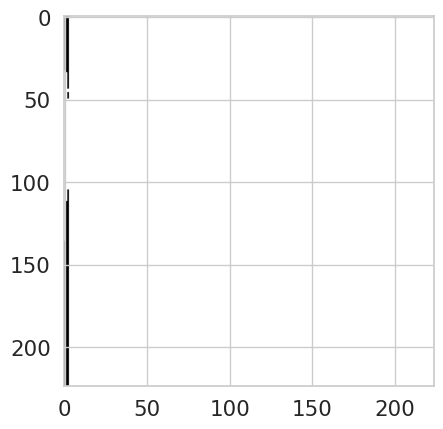

In [279]:
## One of the pre processed image from custom train generator
imageSet0 = trainUNetDataGen[1][0][1]
plt.imshow(imageSet0)

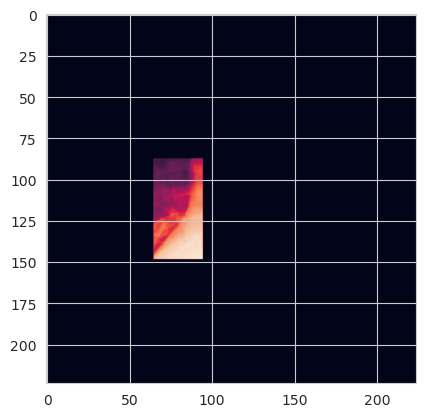

In [120]:
## Masks for the same
imageSet0 = trainUNetDataGen[2][0]
maskSet0 = trainUNetDataGen[2][1]    
showMaskedImage(imageSet0, maskSet0, 5)

In [280]:
ALPHA = 1.0
def create_UNetModelUsingMobileNet(trainable=True):
    """Function to create UNet architecture with MobileNet.
        
    Arguments:
        trainable -- Flag to make layers trainable. Default value is 'True'.
    """
    # Get all layers with 'imagenet' weights
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA, weights="imagenet") 
    # Top layer is last layer of the model
    
    # Make all layers trainable
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    convLayer_112by112 = model.get_layer("conv_pw_1_relu").output
    convLayer_56by56 = model.get_layer("conv_pw_3_relu").output
    convLayer_28by28 = model.get_layer("conv_pw_5_relu").output
    convLayer_14by14 = model.get_layer("conv_pw_11_relu").output
    convLayer_7by7 = model.get_layer("conv_pw_13_relu").output
    # The last layer of mobilenet model is of dimensions (7x7x1024)

    # Start upsampling from 7x7 to 14x14 ...up to 224x224 to form UNET
    # concatinate with the original image layer of the same size from MobileNet
    x = Concatenate()([UpSampling2D()(convLayer_7by7), convLayer_14by14])
    x = Concatenate()([UpSampling2D()(x), convLayer_28by28])
    x = Concatenate()([UpSampling2D()(x), convLayer_56by56])
    x = Concatenate()([UpSampling2D()(x), convLayer_112by112])
    x = UpSampling2D(name="unet_last")(x) # upsample to 224x224

    # Add classification layer
    x = Conv2D(1, kernel_size=1, activation="sigmoid", name="masks")(x)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x) 

    return Model(inputs=model.input, outputs=x)

In [281]:
## Build a model 
input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)
model_Unet = create_UNetModelUsingMobileNet(input_shape)
model_Unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [283]:
#dice_coef 2 * the Area of Overlap divided by the total number of pixels in both images
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + tf.keras.backend.epsilon()) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + tf.keras.backend.epsilon())

## Loss is 1 - the coefficent of two images
def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [285]:
## Call Backs for ealy stopping and reduce learning rate 
## Reduce the learning rate when teh validation loss is same for 4 epocs
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

In [286]:
## Optimiser , metrics and loss for the model
opt = tf.keras.optimizers.Nadam(0.001)
metrics = [dice_coef, Recall(), Precision()]
model_Unet.compile(loss=dice_loss, optimizer=opt, metrics=metrics)

In [287]:
input_shape = trainUNetDataGen[0][0].shape[1:]
print("Input shape of trainUNetDataGen:", input_shape)

Input shape of trainUNetDataGen: (224, 224, 3)


In [314]:
## Running the model
BATCH_SIZE = 4

train_steps = len(trainUNetDataGen)//BATCH_SIZE
valid_steps = len(validateUNetDataGen)//BATCH_SIZE

if len(trainUNetDataGen) % BATCH_SIZE != 0:
    train_steps += 1
if len(validateUNetDataGen) % BATCH_SIZE != 0:
    valid_steps += 1


history_Unet = model_Unet.fit(trainUNetDataGen,
                        epochs=10,
                        steps_per_epoch=train_steps,
                        validation_data=validateUNetDataGen,
                        callbacks=callbacks,
                        use_multiprocessing=False,
                        workers=4,
                        validation_steps=valid_steps,                      
                        shuffle=True)

Epoch 1/10
313/313 [==============================] - 144s 459ms/step - loss: 0.7848 - dice_coef: 0.2152 - recall_1: 0.4938 - precision_1: 0.1660 - val_loss: 0.8806 - val_dice_coef: 0.1194 - val_recall_1: 0.5525 - val_precision_1: 0.1454 - lr: 0.0010
Epoch 2/10
313/313 [==============================] - 143s 457ms/step - loss: 0.7804 - dice_coef: 0.2196 - recall_1: 0.4737 - precision_1: 0.1752 - val_loss: 0.8847 - val_dice_coef: 0.1153 - val_recall_1: 0.7456 - val_precision_1: 0.1043 - lr: 0.0010
Epoch 3/10
313/313 [==============================] - 109s 346ms/step - loss: 0.7745 - dice_coef: 0.2255 - recall_1: 0.4885 - precision_1: 0.1821 - val_loss: 0.8755 - val_dice_coef: 0.1245 - val_recall_1: 0.5753 - val_precision_1: 0.1364 - lr: 0.0010
Epoch 4/10
313/313 [==============================] - 106s 339ms/step - loss: 0.7737 - dice_coef: 0.2263 - recall_1: 0.4482 - precision_1: 0.1876 - val_loss: 0.8803 - val_dice_coef: 0.1197 - val_recall_1: 0.6900 - val_precision_1: 0.1116 - lr: 0.0

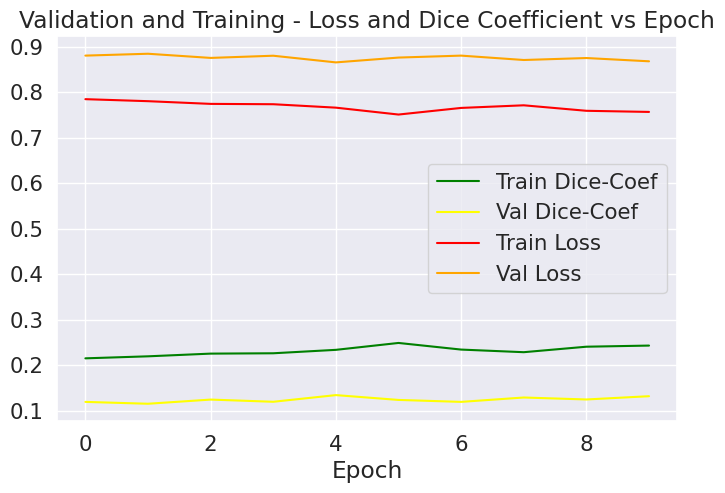

In [315]:
## PLot Matrix between training and validation data
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(history_Unet.history['dice_coef'],     label='Train Dice-Coef',      color = "green" );
plt.plot(history_Unet.history['val_dice_coef'], label='Val Dice-Coef',  color = "yellow");
plt.plot(history_Unet.history['loss'],         label='Train Loss',          color = "red"   );
plt.plot(history_Unet.history['val_loss'],     label='Val Loss',      color = "orange");
plt.title("Validation and Training - Loss and Dice Coefficient vs Epoch")
plt.xlabel("Epoch")
plt.legend();

#### val_dice-oefficient value is very low and pretty much a flat curve, indicating underfitting indicating model has not learnt sufficiently. It has no sufficient training(more epochs needed).

#### We have used an image size of 224x224 as against the original size of 1024x1024. Using a higher resolution, could also improve training capacity

#### Hyper-parameter tuning, image_augmentation, using different architectures will help in increasing model performance and generalization.

In [316]:
##Preparing test data , picked up random 20 images
test_CombinedData = labels[15000:15020]
test_CombinedData.fillna(0, inplace=True)

In [317]:
## Check target distrubution in test dataset, there are both the classes available with equal sdistrubution
test_CombinedData.Target.value_counts()

0    10
1    10
Name: Target, dtype: int64

In [318]:
## Setting the custom generator for test data
testUNetDataGen = TrainGenerator(test_CombinedData)

In [319]:
## evaluating the model
test_steps = (len(testUNetDataGen)//BATCH_SIZE)
if len(testUNetDataGen) % BATCH_SIZE != 0:
    test_steps += 1

model_Unet.evaluate(testUNetDataGen)

5/5 [==============================] - 1s 155ms/step - loss: 0.6369 - dice_coef: 0.3631 - recall_1: 0.5143 - precision_1: 0.3300


[0.6369339823722839,
 0.36306601762771606,
 0.5143372416496277,
 0.32997262477874756]

#### Model evaluation , dice coef = 37% , recall is less  at 57% , precission is very low , of about 32%

In [320]:
## Precidt the test data that we have
pred_mask = model_Unet.predict(testUNetDataGen)

5/5 [==============================] - 1s 153ms/step


In [321]:
test_CombinedData = test_CombinedData.reset_index()

In [322]:
from sklearn.metrics import confusion_matrix
y_pred = []
y_True = []
imageList = []
predMaskTemp = []
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
def getPredictions(test_CombinedData):
    masks = np.zeros((int(test_CombinedData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
    for index, row in test_CombinedData.iterrows():
        patientId = row.patientId
#         print(patientId)

        classlabel = row["Target"]
        dcm_file = '/kaggle/input/pneumonia-detection/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = pydicom.dcmread(dcm_file)
        img = dcm_data.pixel_array
        resized_img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH), interpolation = cv2.INTER_LINEAR)
        predMaskTemp.append(pred_mask[index])
        iou = (pred_mask[index] > 0.5) * 1.0
        y_pred.append((1 in iou) * 1)
        imageList.append(resized_img)
        y_True.append(classlabel)
        x_scale = IMAGE_HEIGHT / 1024
        y_scale = IMAGE_WIDTH / 1024

        if(classlabel == 1):
            x = int(np.round(row['x'] * x_scale))
            y = int(np.round(row['y'] * y_scale))
            w = int(np.round(row['width'] * x_scale))
            h = int(np.round(row['height'] * y_scale))
            masks[index][y:y+h, x:x+w] = 1
    tmpImages = np.array(imageList)
    tmpMask = np.array(predMaskTemp)
    originalMask = np.array(masks)
    return (y_True,y_pred,tmpImages,tmpMask ,originalMask)
    
def print_confusion_matrix(y_true, y_pred):
    '''Function to print confusion_matrix'''
    # Get confusion matrix array
    array = confusion_matrix(y_true, y_pred)    
    df_cm = pd.DataFrame(array, range(2), range(2))
    print("Total samples = ", len(test_CombinedData))
    # Plot heatmap and get sns heatmap values
    sns.set(font_scale=1.4); # for label size
    result = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', cbar=False); 
    # Add labels to heatmap
    labels = ['TN=','FP=','FN=','TP=']
    i=0
    for t in result.texts:
        t.set_text(labels[i] + t.get_text())
        i += 1
    plt.xlabel("Predicted Values")
    plt.ylabel('True Values')
    plt.show()
    return

In [323]:
## Create predictions map
y_true,y_pred ,imagelist , maskList , originalMask = getPredictions(test_CombinedData)

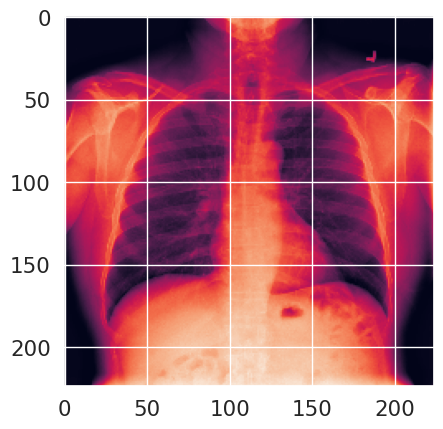

In [324]:
plt.imshow(imagelist[12]);

Text(0.5, 0, 'Pneumonia 1:')

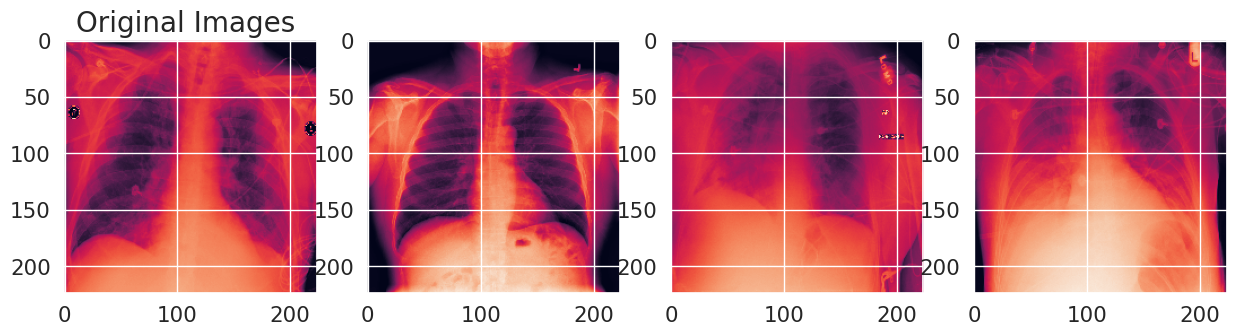

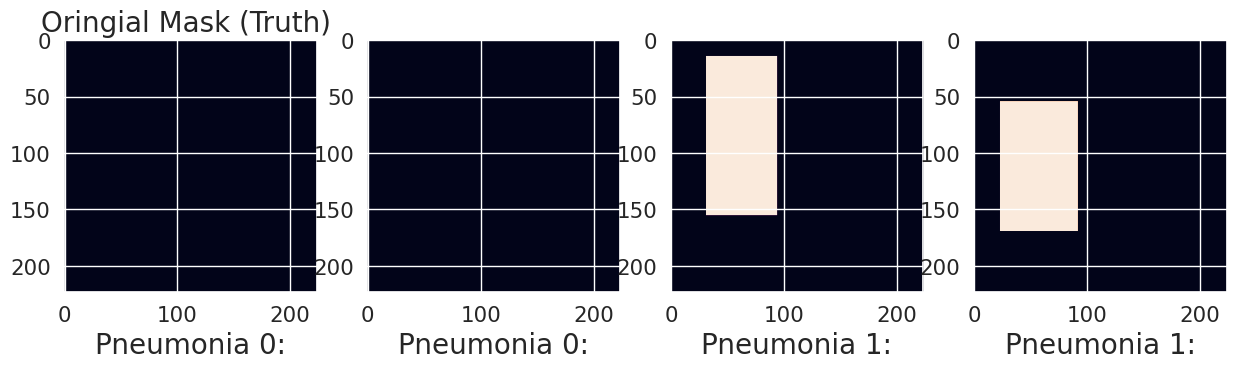

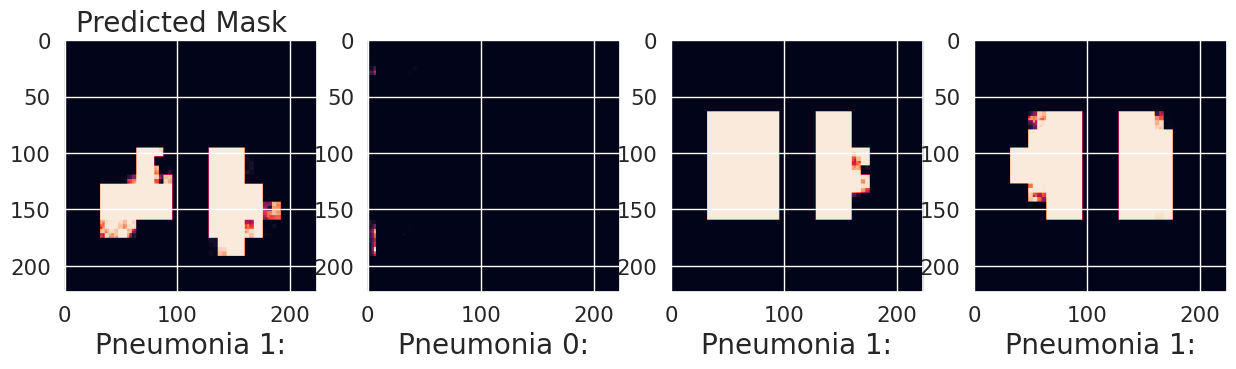

In [325]:
## Visualising the train and output data 

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(imagelist[1])
a.set_title('Original Images ',fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(imagelist[12])

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(imagelist[13])

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(imagelist[15])

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(originalMask[1])
a.set_title('Oringial Mask (Truth) ',fontsize=20)

a.set_xlabel('Pneumonia {}:'.format(y_true[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(originalMask[12])
a.set_xlabel('Pneumonia {}:'.format(y_true[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(originalMask[13])
a.set_xlabel('Pneumonia {}:'.format(y_true[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(originalMask[15])
a.set_xlabel('Pneumonia {}:'.format(y_true[15]), fontsize=20)

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
a.set_title('Predicted Mask  ',fontsize=20)
imgplot = plt.imshow(maskList[1])
a.set_xlabel('Pneumonia {}:'.format(y_pred[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(maskList[12])
a.set_xlabel('Pneumonia {}:'.format(y_pred[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(maskList[13])
a.set_xlabel('Pneumonia {}:'.format(y_pred[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(maskList[15])
a.set_xlabel('Pneumonia {}:'.format(y_pred[15]), fontsize=20)

#### we could see that the first  one is mis-classifed
#### Second one is classified correctly , there are no masks
#### Thrid is predcited correctly and the bounding box is also almost at the same position
#### fourth is predicted correctly but there are two boudning boxes, this culd be because there are duplicate patient id and we are picking only one mask to display inte Truth


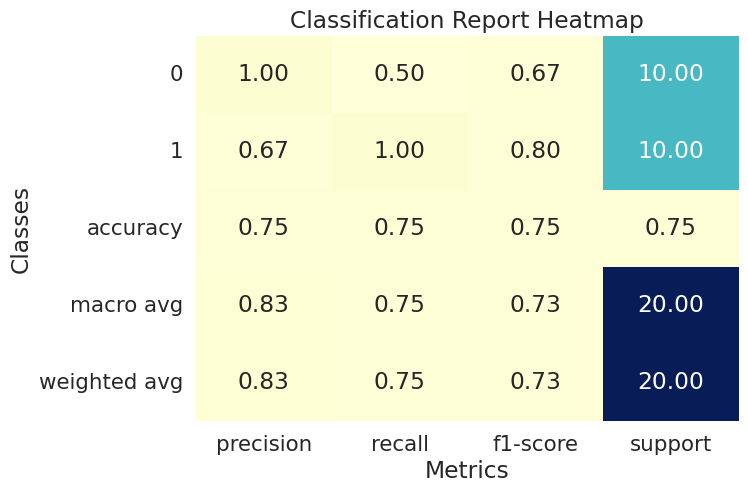

In [326]:
def print_classification_report_heatmap(y_true, y_pred):
    # Get the classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    # Convert the dictionary to a DataFrame
    report_df = pd.DataFrame(report_dict).transpose()

    # Plot the heatmap using seaborn
    sns.set(font_scale=1.4)  # for label size
    plt.figure(figsize=(7, 5))
    result = sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt='.2f', cbar=False)

    # Add labels to the heatmap
    plt.xlabel("Metrics")
    plt.ylabel('Classes')
    plt.title("Classification Report Heatmap")

    # Show the plot
    plt.show()

print_classification_report_heatmap(y_true, y_pred)

In [327]:
import pickle

# DDirectory path to save the model
save_dir = "/kaggle/working/Models/"

# Create the directory if it doesn't exist
import os
os.makedirs(save_dir, exist_ok=True)

## Save the model to the directory
model_path = os.path.join(save_dir, "model_Unet.pkl")
with open(model_path, "wb") as f:
    pickle.dump(model_Unet, f)

print(f"Model saved to {model_path}")

Model saved to /kaggle/working/Models/model_Unet.pkl


In [328]:
# Create a DataFrame to hold the submission data
submission_df = pd.DataFrame({
    'patientId': test_CombinedData['patientId'],
    'Prediction': y_pred
})

# Export the DataFrame to a CSV file
submission_filename = 'Unet_submisiion.csv'
submission_df.to_csv(submission_filename, index=False)

print(f'CSV file "{submission_filename}" created.')

CSV file "Unet_submisiion.csv" created.
